# Cancer Prediction

"Importing The Required Libraries & Packages"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

"Changing The Default Working  Directory & Path "

In [2]:
os.chdir('D:\\bala\\study things\\data science\\Batch 74 Day 31\\Batch 74 Day 31\\Project to Explain Classifciation\\')

"Reading The Dataset Using Pandas Command"

In [3]:
df = pd.read_csv('data.csv')

"Checking the Null values of all the Columns in the dataset"

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

"Checking the data type of all available columns in the dataset"

In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

"Checking the dataset whether its is having a duplicate values or not"

In [7]:
df.duplicated().sum()

0

"Label Encoding the diagnosis column in the dataset"

In [8]:
df['diagnosis']=df['diagnosis'].astype('category')

In [9]:
df['diagnosis']=df['diagnosis'].cat.codes

"Checking the value counts for diagnosis columns "

In [9]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

" Checking the total shape of the dataset "

In [10]:
df.shape

(569, 32)

"Assigning the dependent and independent variables"

In [12]:
x = df.drop(['id','diagnosis'],axis=1)
y = df['diagnosis']

"Getting the correlation value from all the numeric columns from the independent variable using seaborn Heatmap & sacing the PNG file "

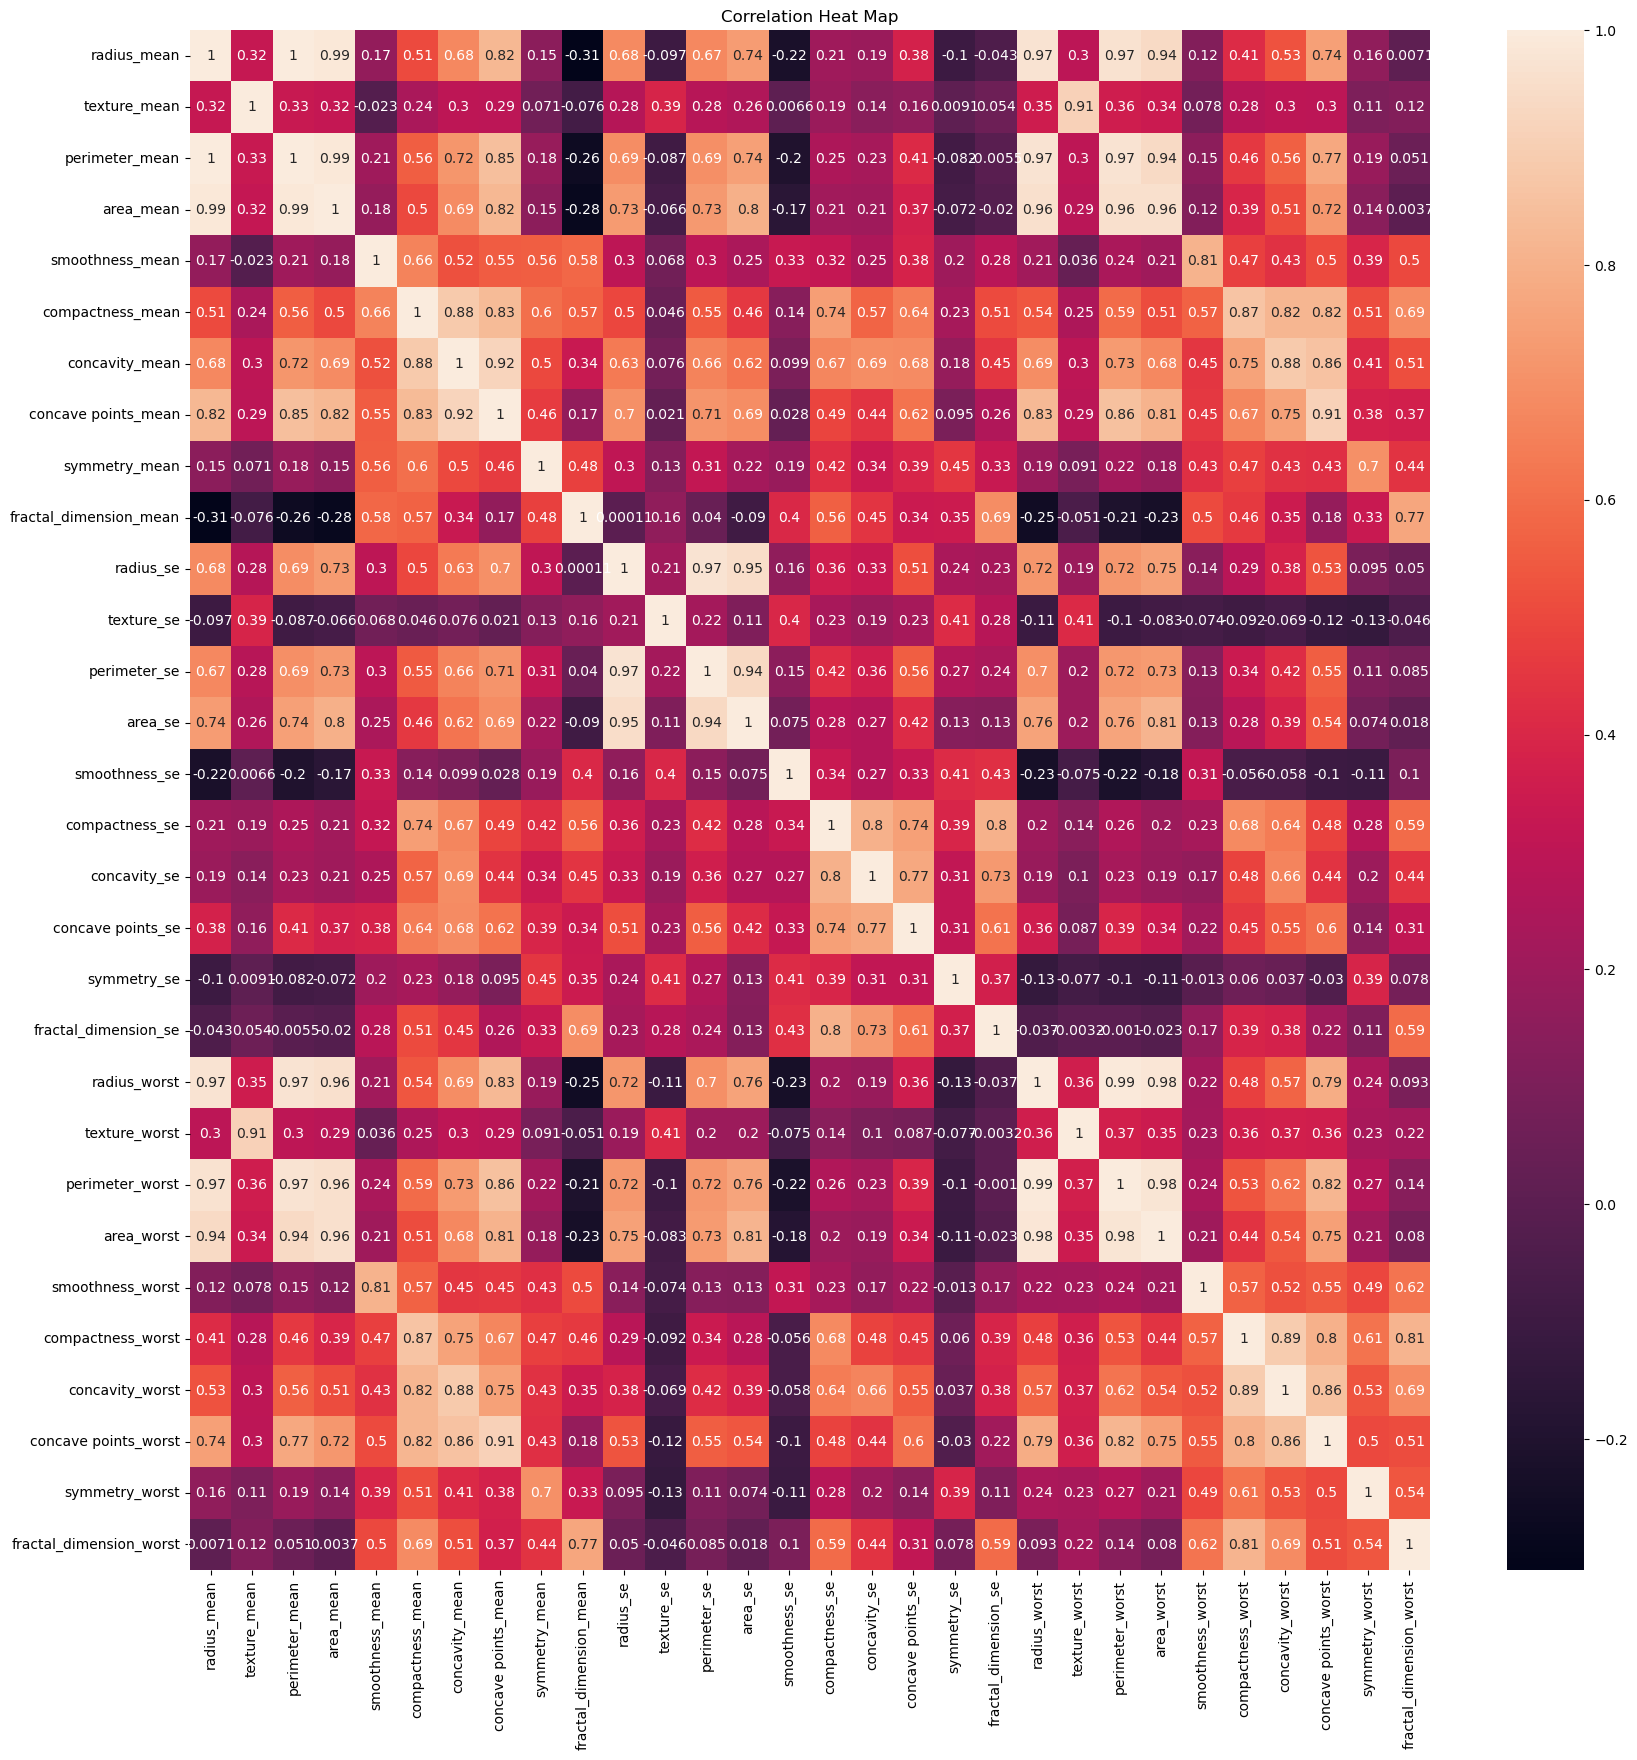

In [13]:
co_rel= x.corr()
plt.rcParams['figure.figsize']=(20,20)
sns.heatmap (co_rel,annot = True)
plt.title('Correlation Heat Map')
plt.savefig('Correlation Heat Map.png')
plt.show()

"Checking The outlier of all columns of the independent variables using Seaborn box plot in the following six cells"

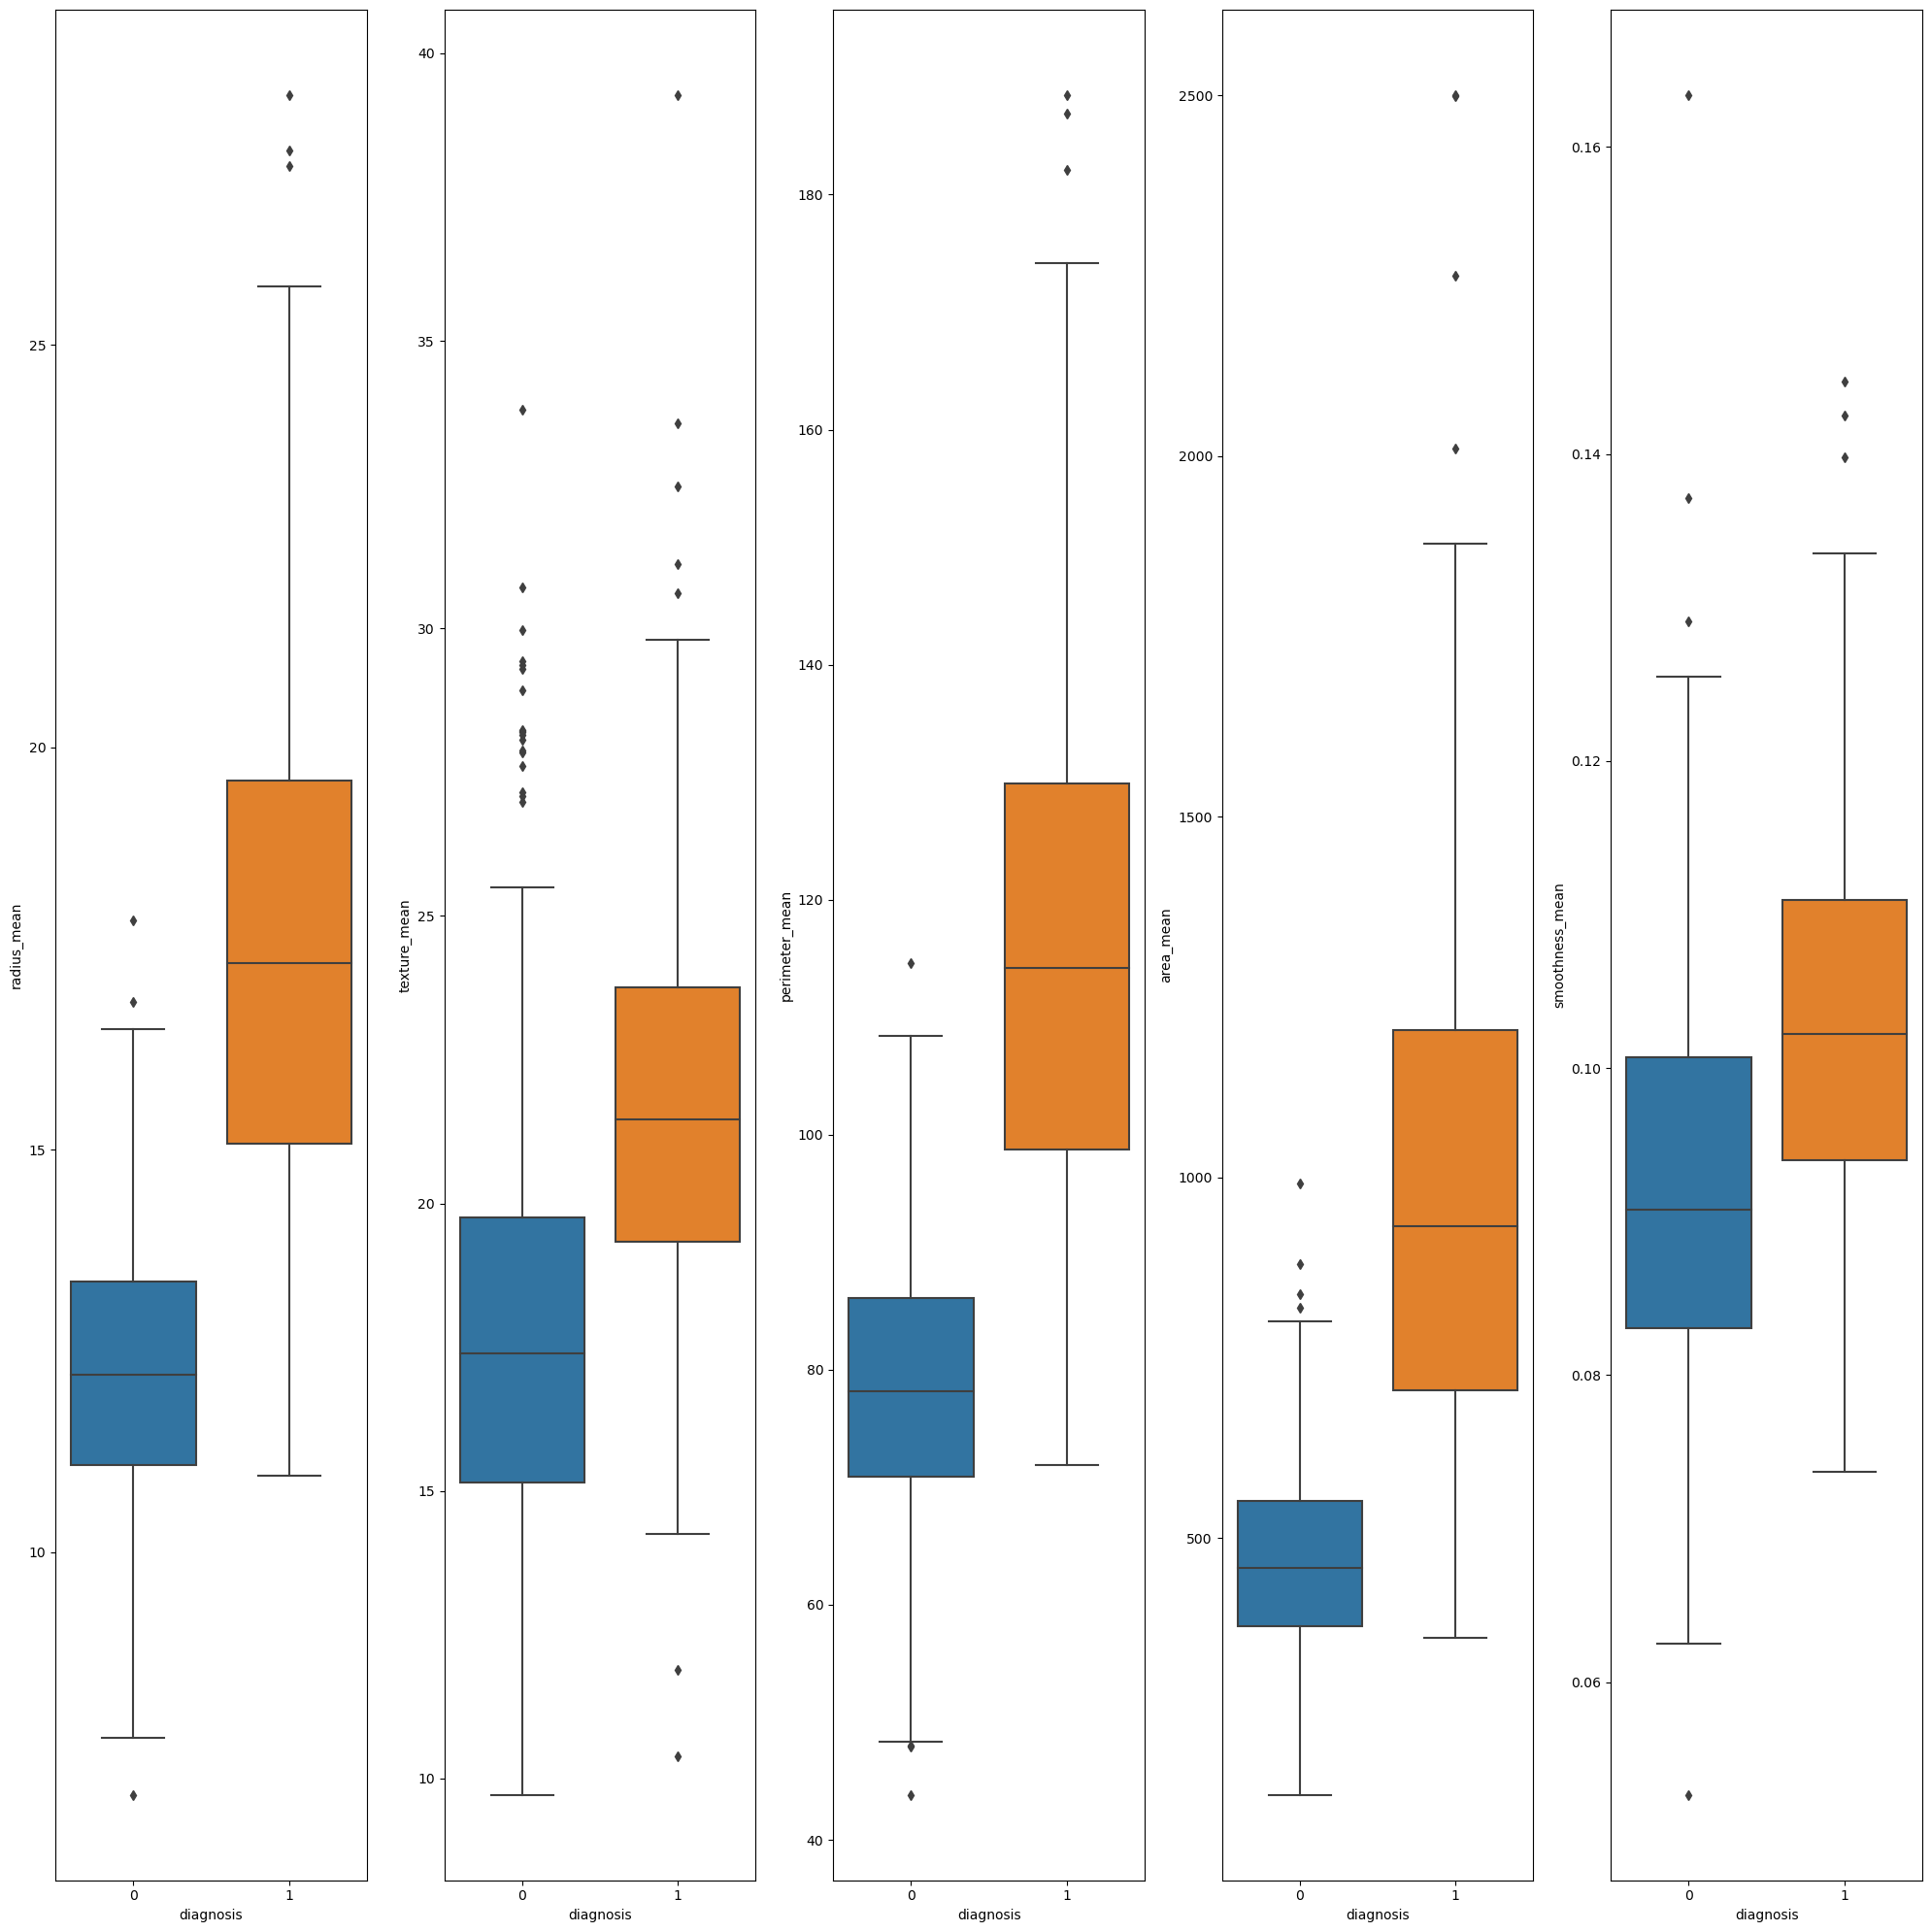

In [14]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5) # 1 -Number of rows 5 -Number of columns
sns.boxplot ( x= df['diagnosis'], y = df['radius_mean'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['texture_mean'], ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['perimeter_mean'], ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['area_mean'] , ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['smoothness_mean']  , ax = ax5)
f .tight_layout()

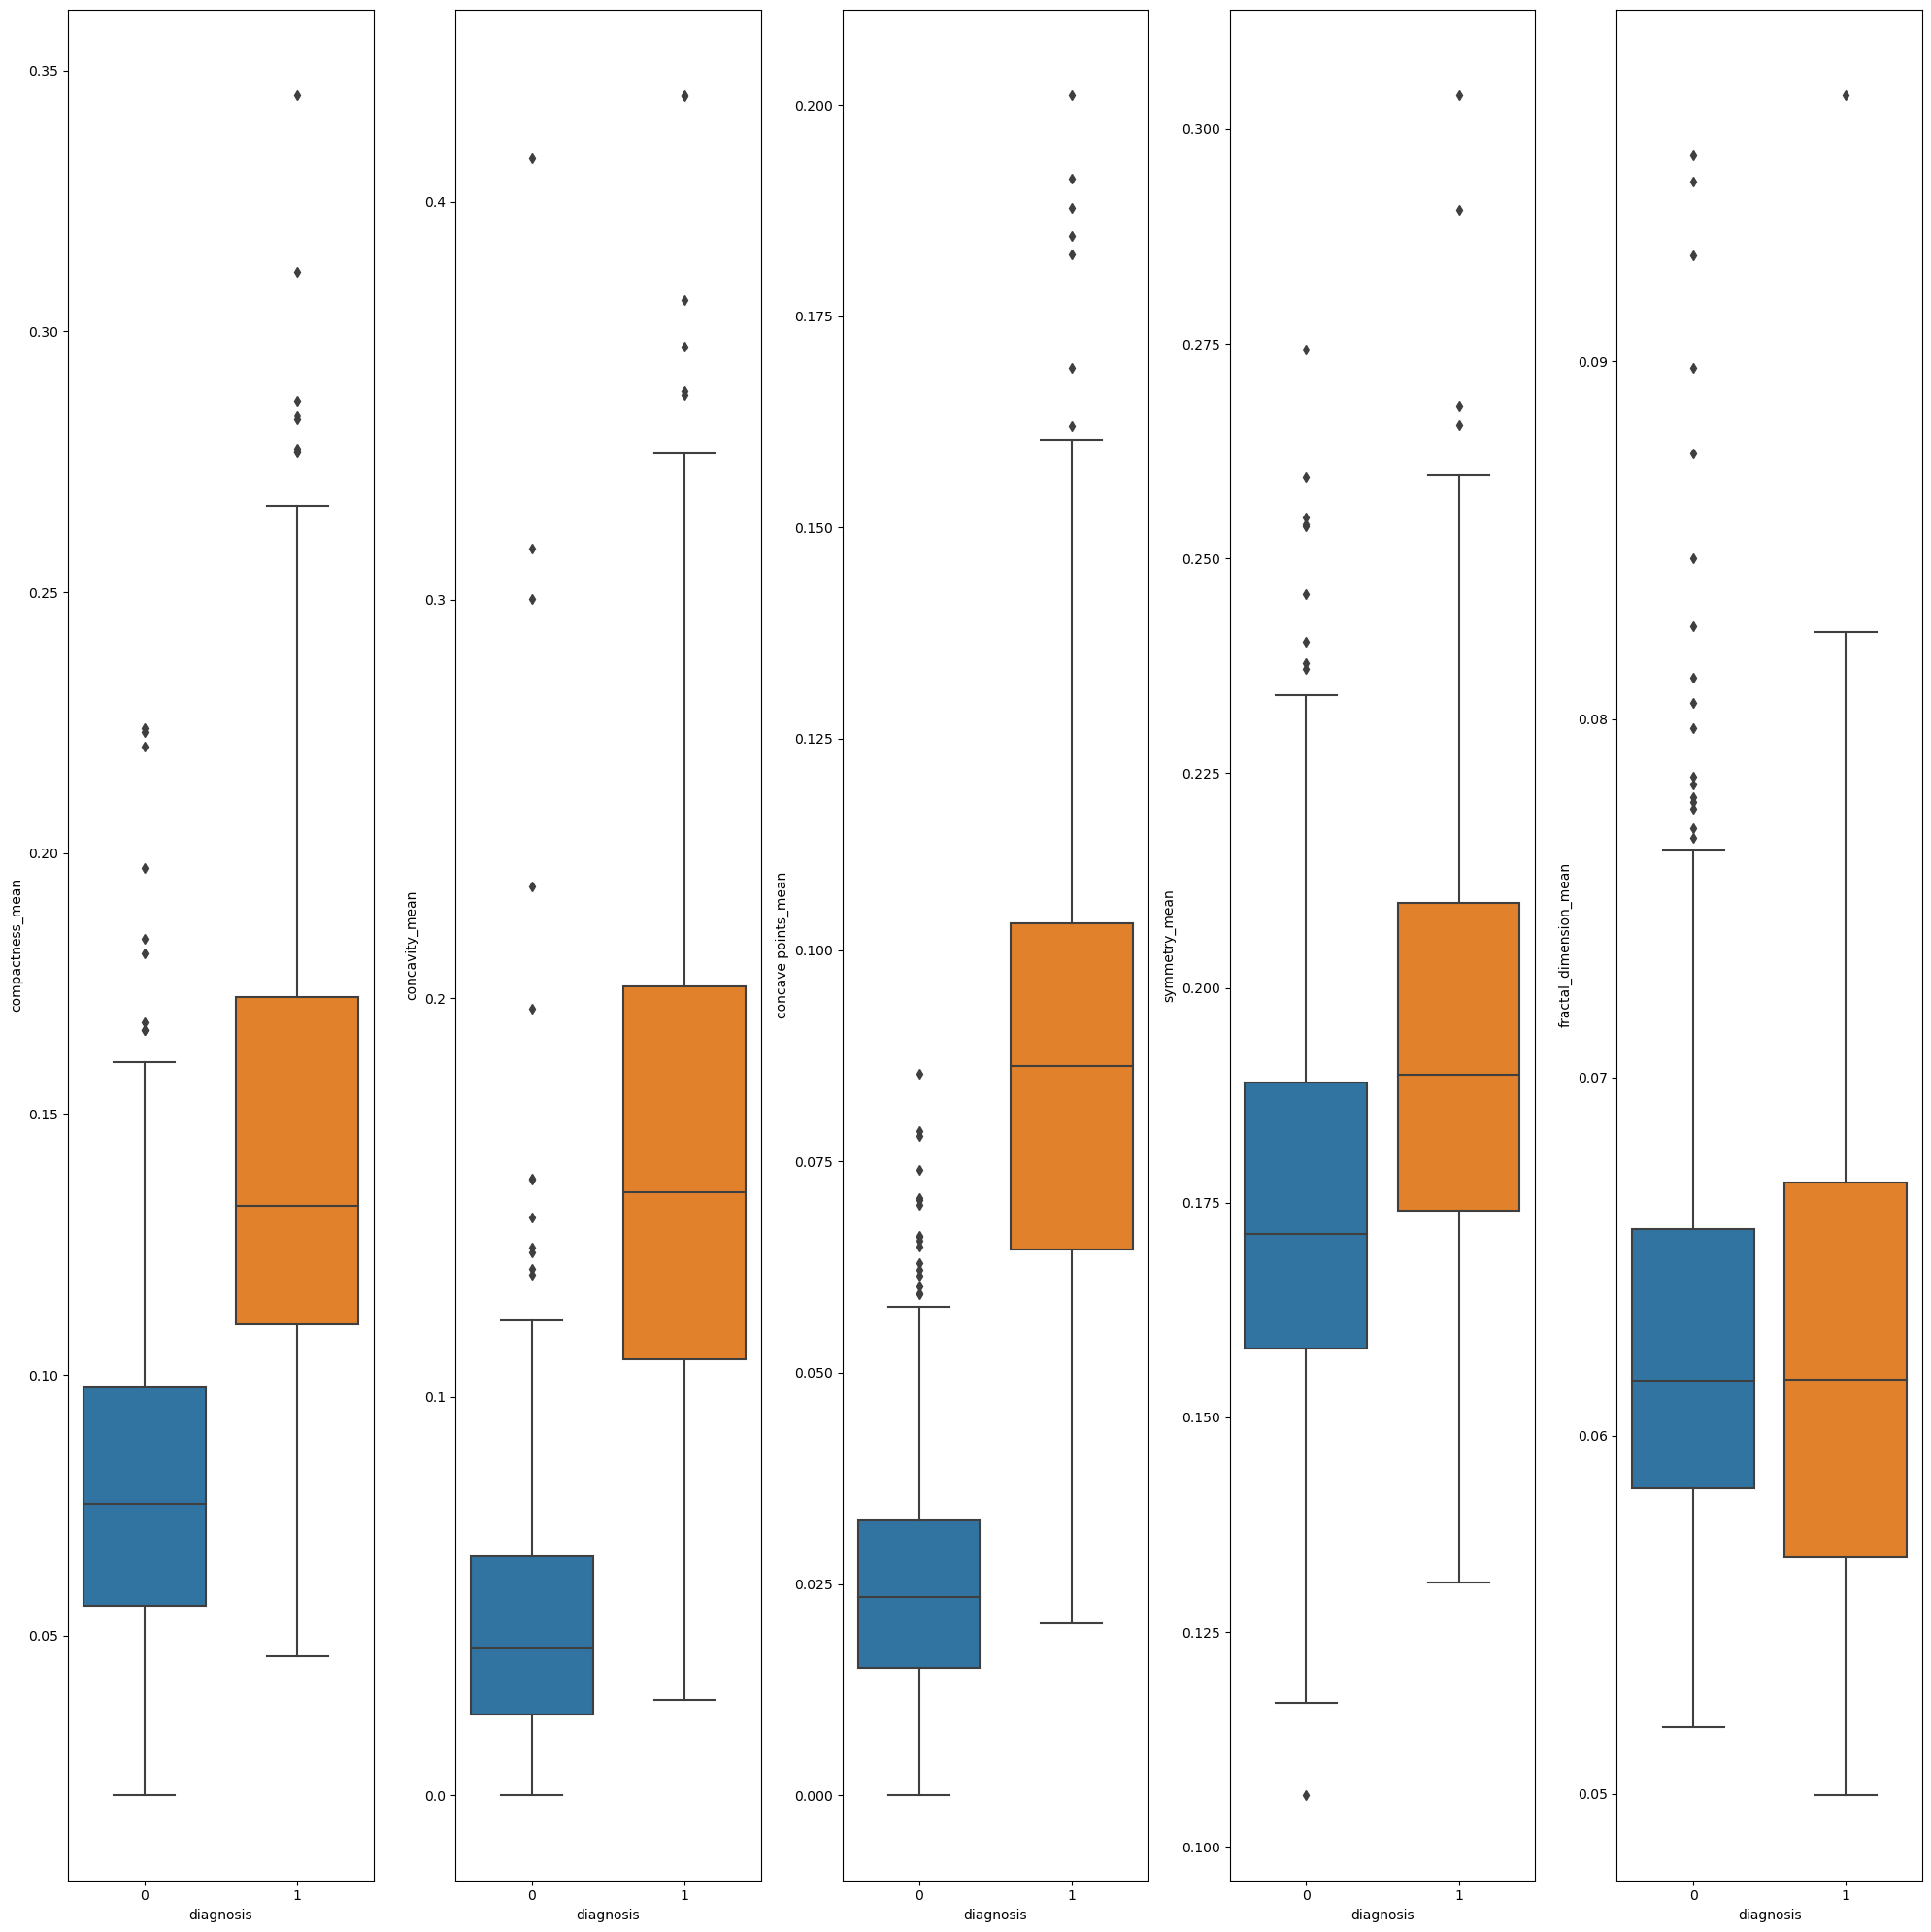

In [15]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot (x= df['diagnosis'], y = df['compactness_mean'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['concavity_mean'] , ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['concave points_mean'] , ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['symmetry_mean'], ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['fractal_dimension_mean'] , ax = ax5)
f .tight_layout()

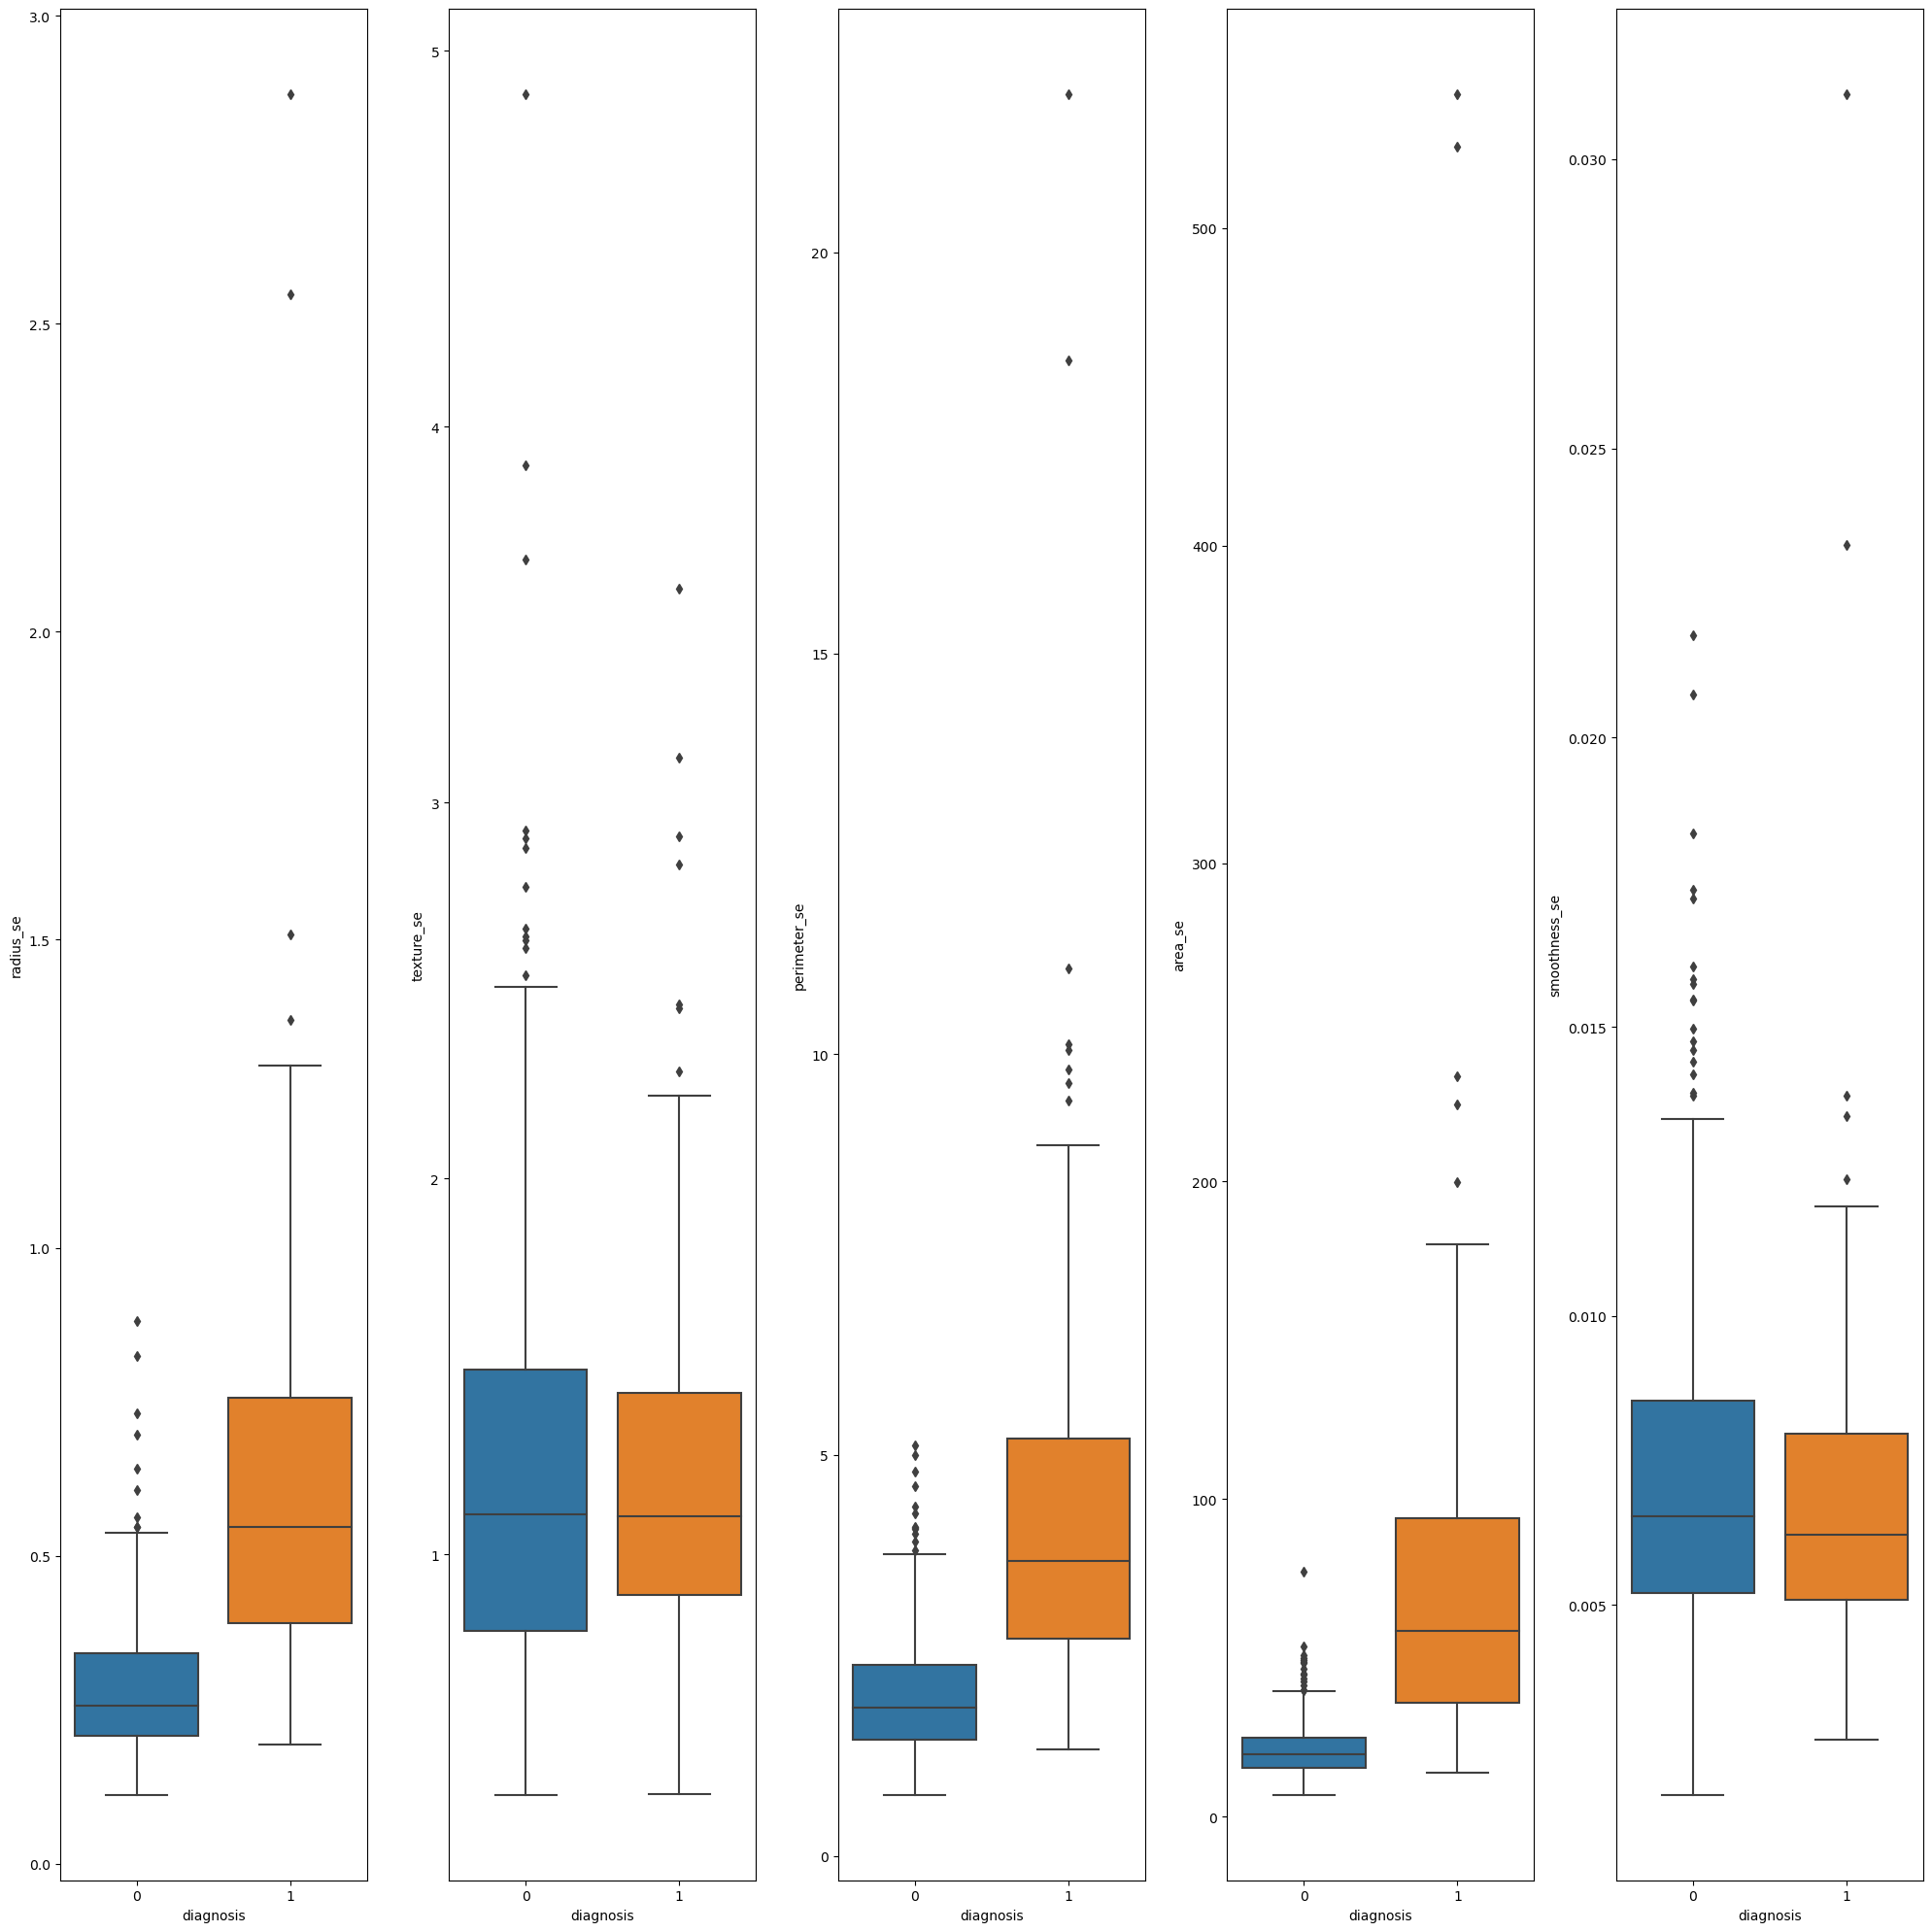

In [16]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5) # 1 -Number of rows 5 -Number of columns
sns.boxplot ( x= df['diagnosis'], y = df['radius_se'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['texture_se'], ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['perimeter_se'], ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['area_se'] , ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['smoothness_se']  , ax = ax5)
f .tight_layout()

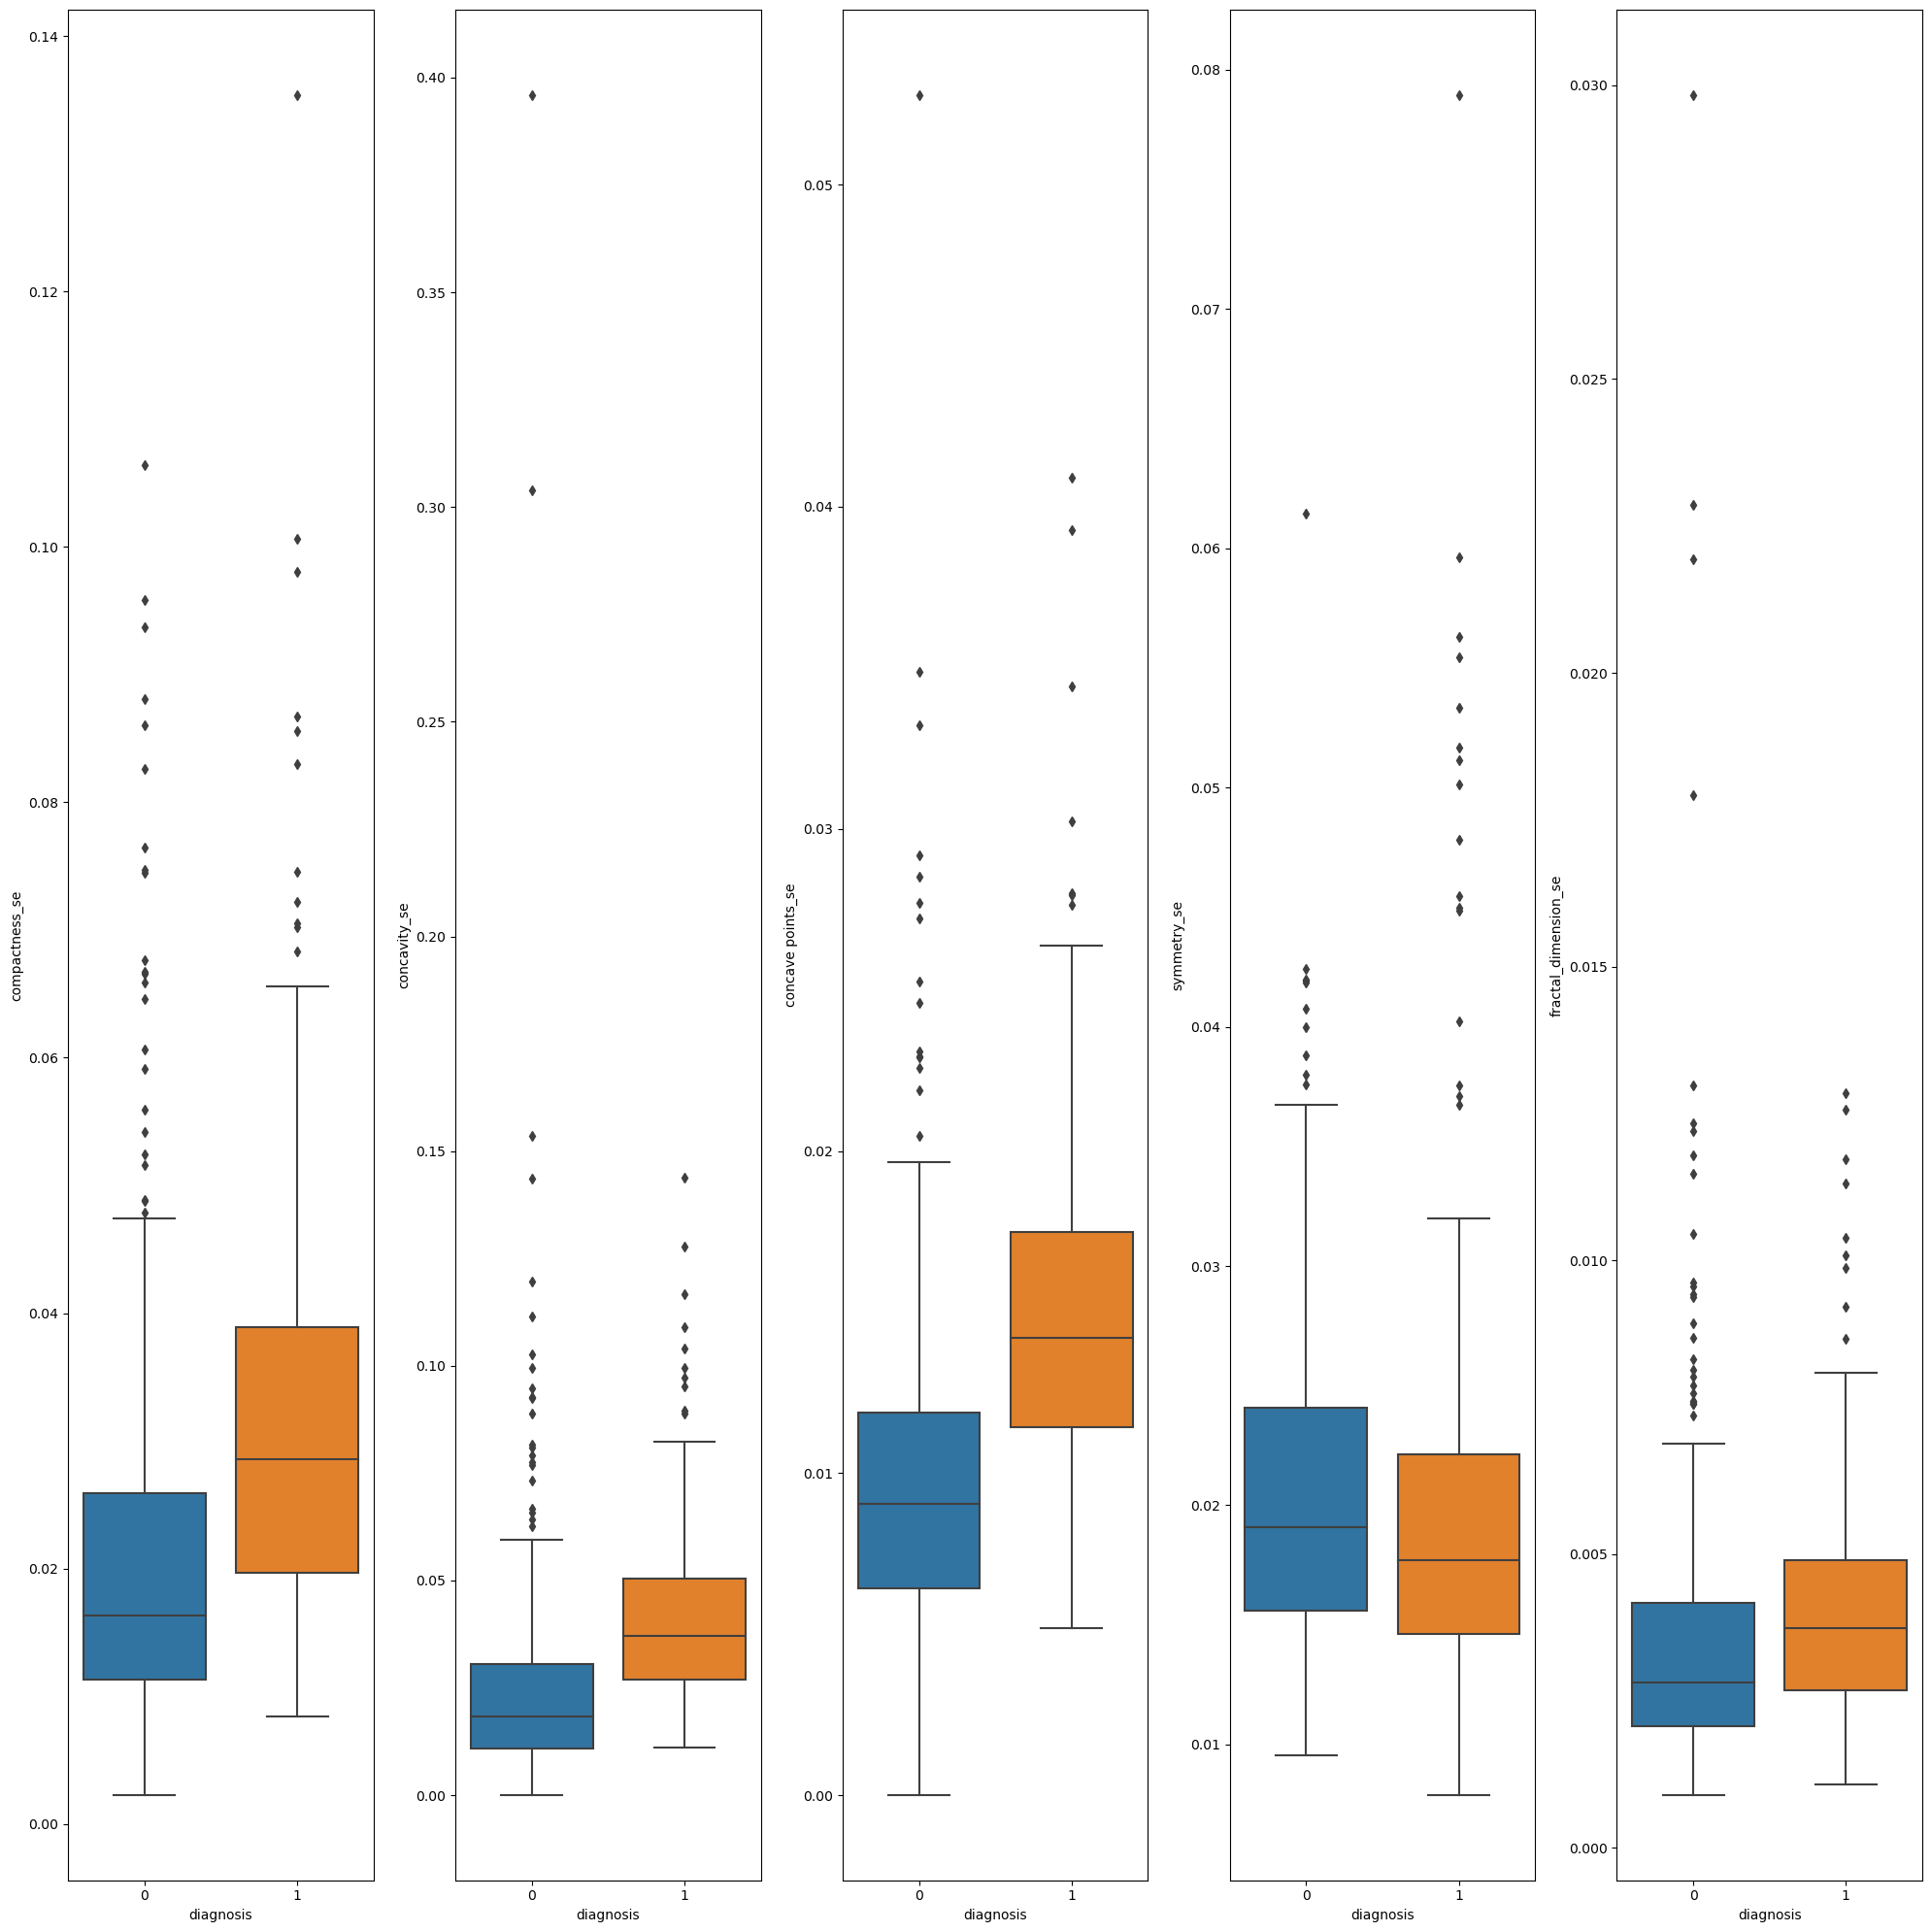

In [17]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot (x= df['diagnosis'], y = df['compactness_se'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['concavity_se'] , ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['concave points_se'] , ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['symmetry_se'], ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['fractal_dimension_se'] , ax = ax5)
f .tight_layout()

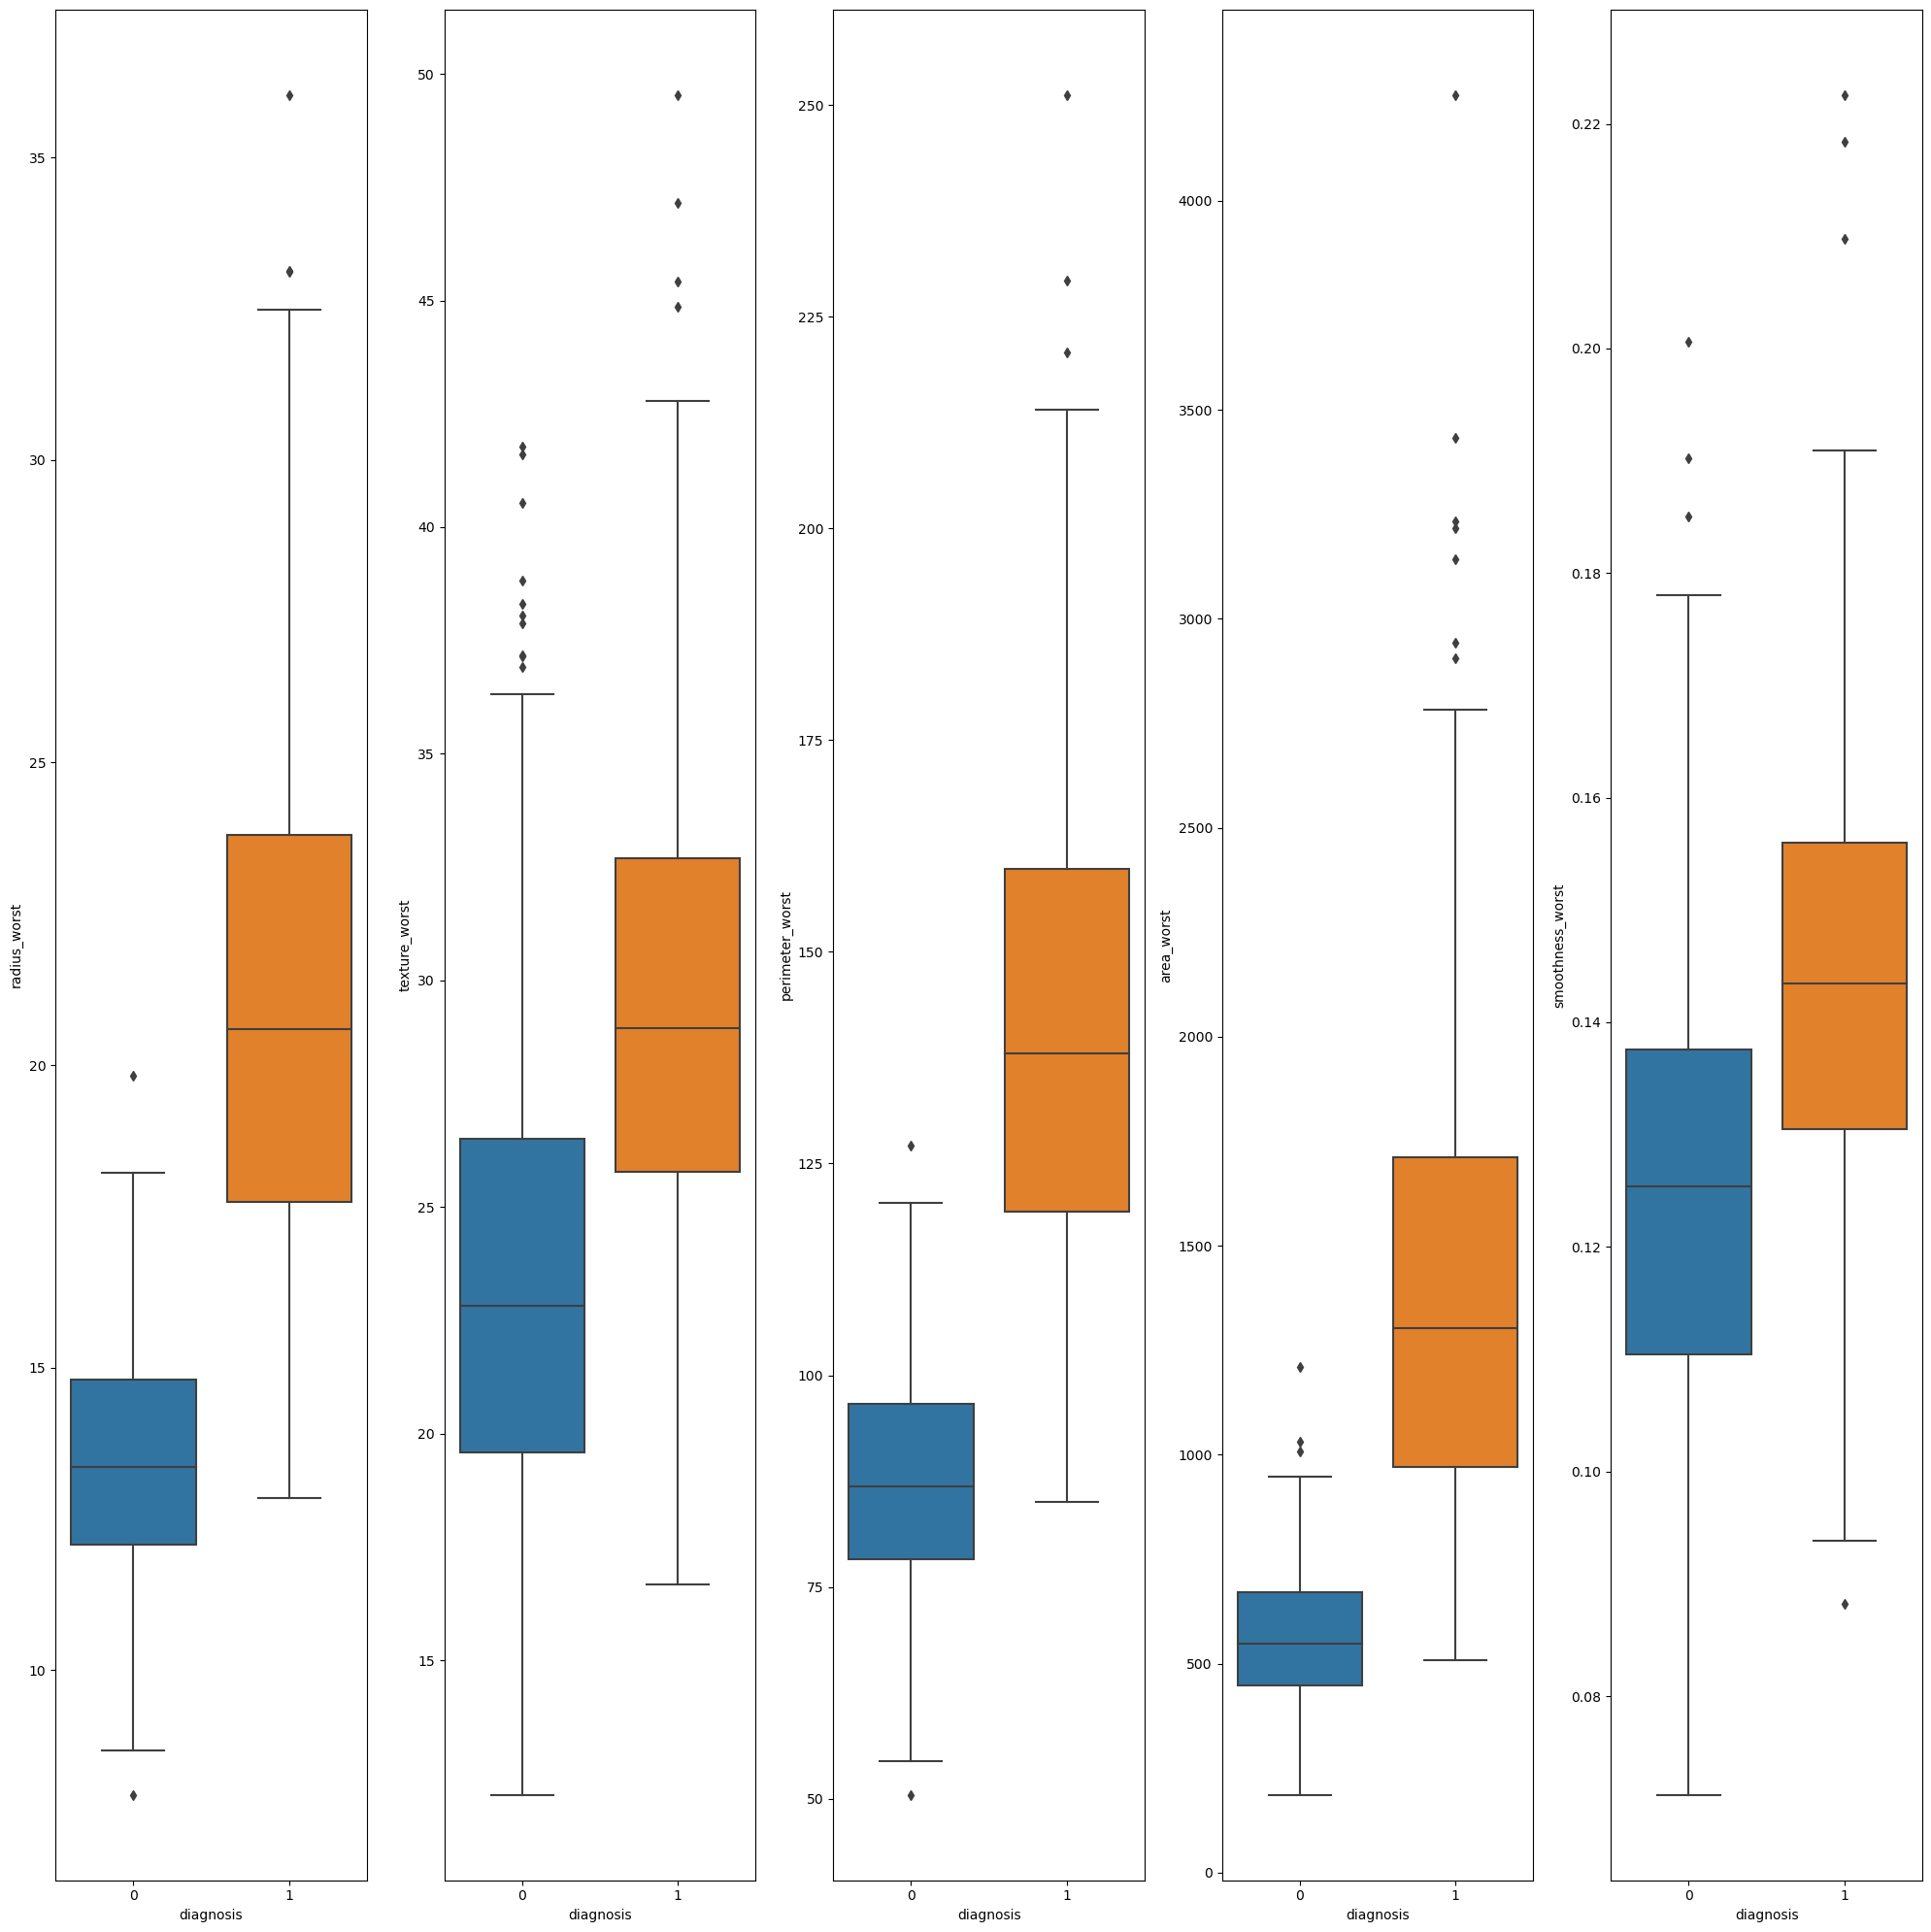

In [18]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5) # 1 -Number of rows 5 -Number of columns
sns.boxplot ( x= df['diagnosis'], y = df['radius_worst'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['texture_worst'], ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['perimeter_worst'], ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['area_worst'] , ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['smoothness_worst']  , ax = ax5)
f .tight_layout()

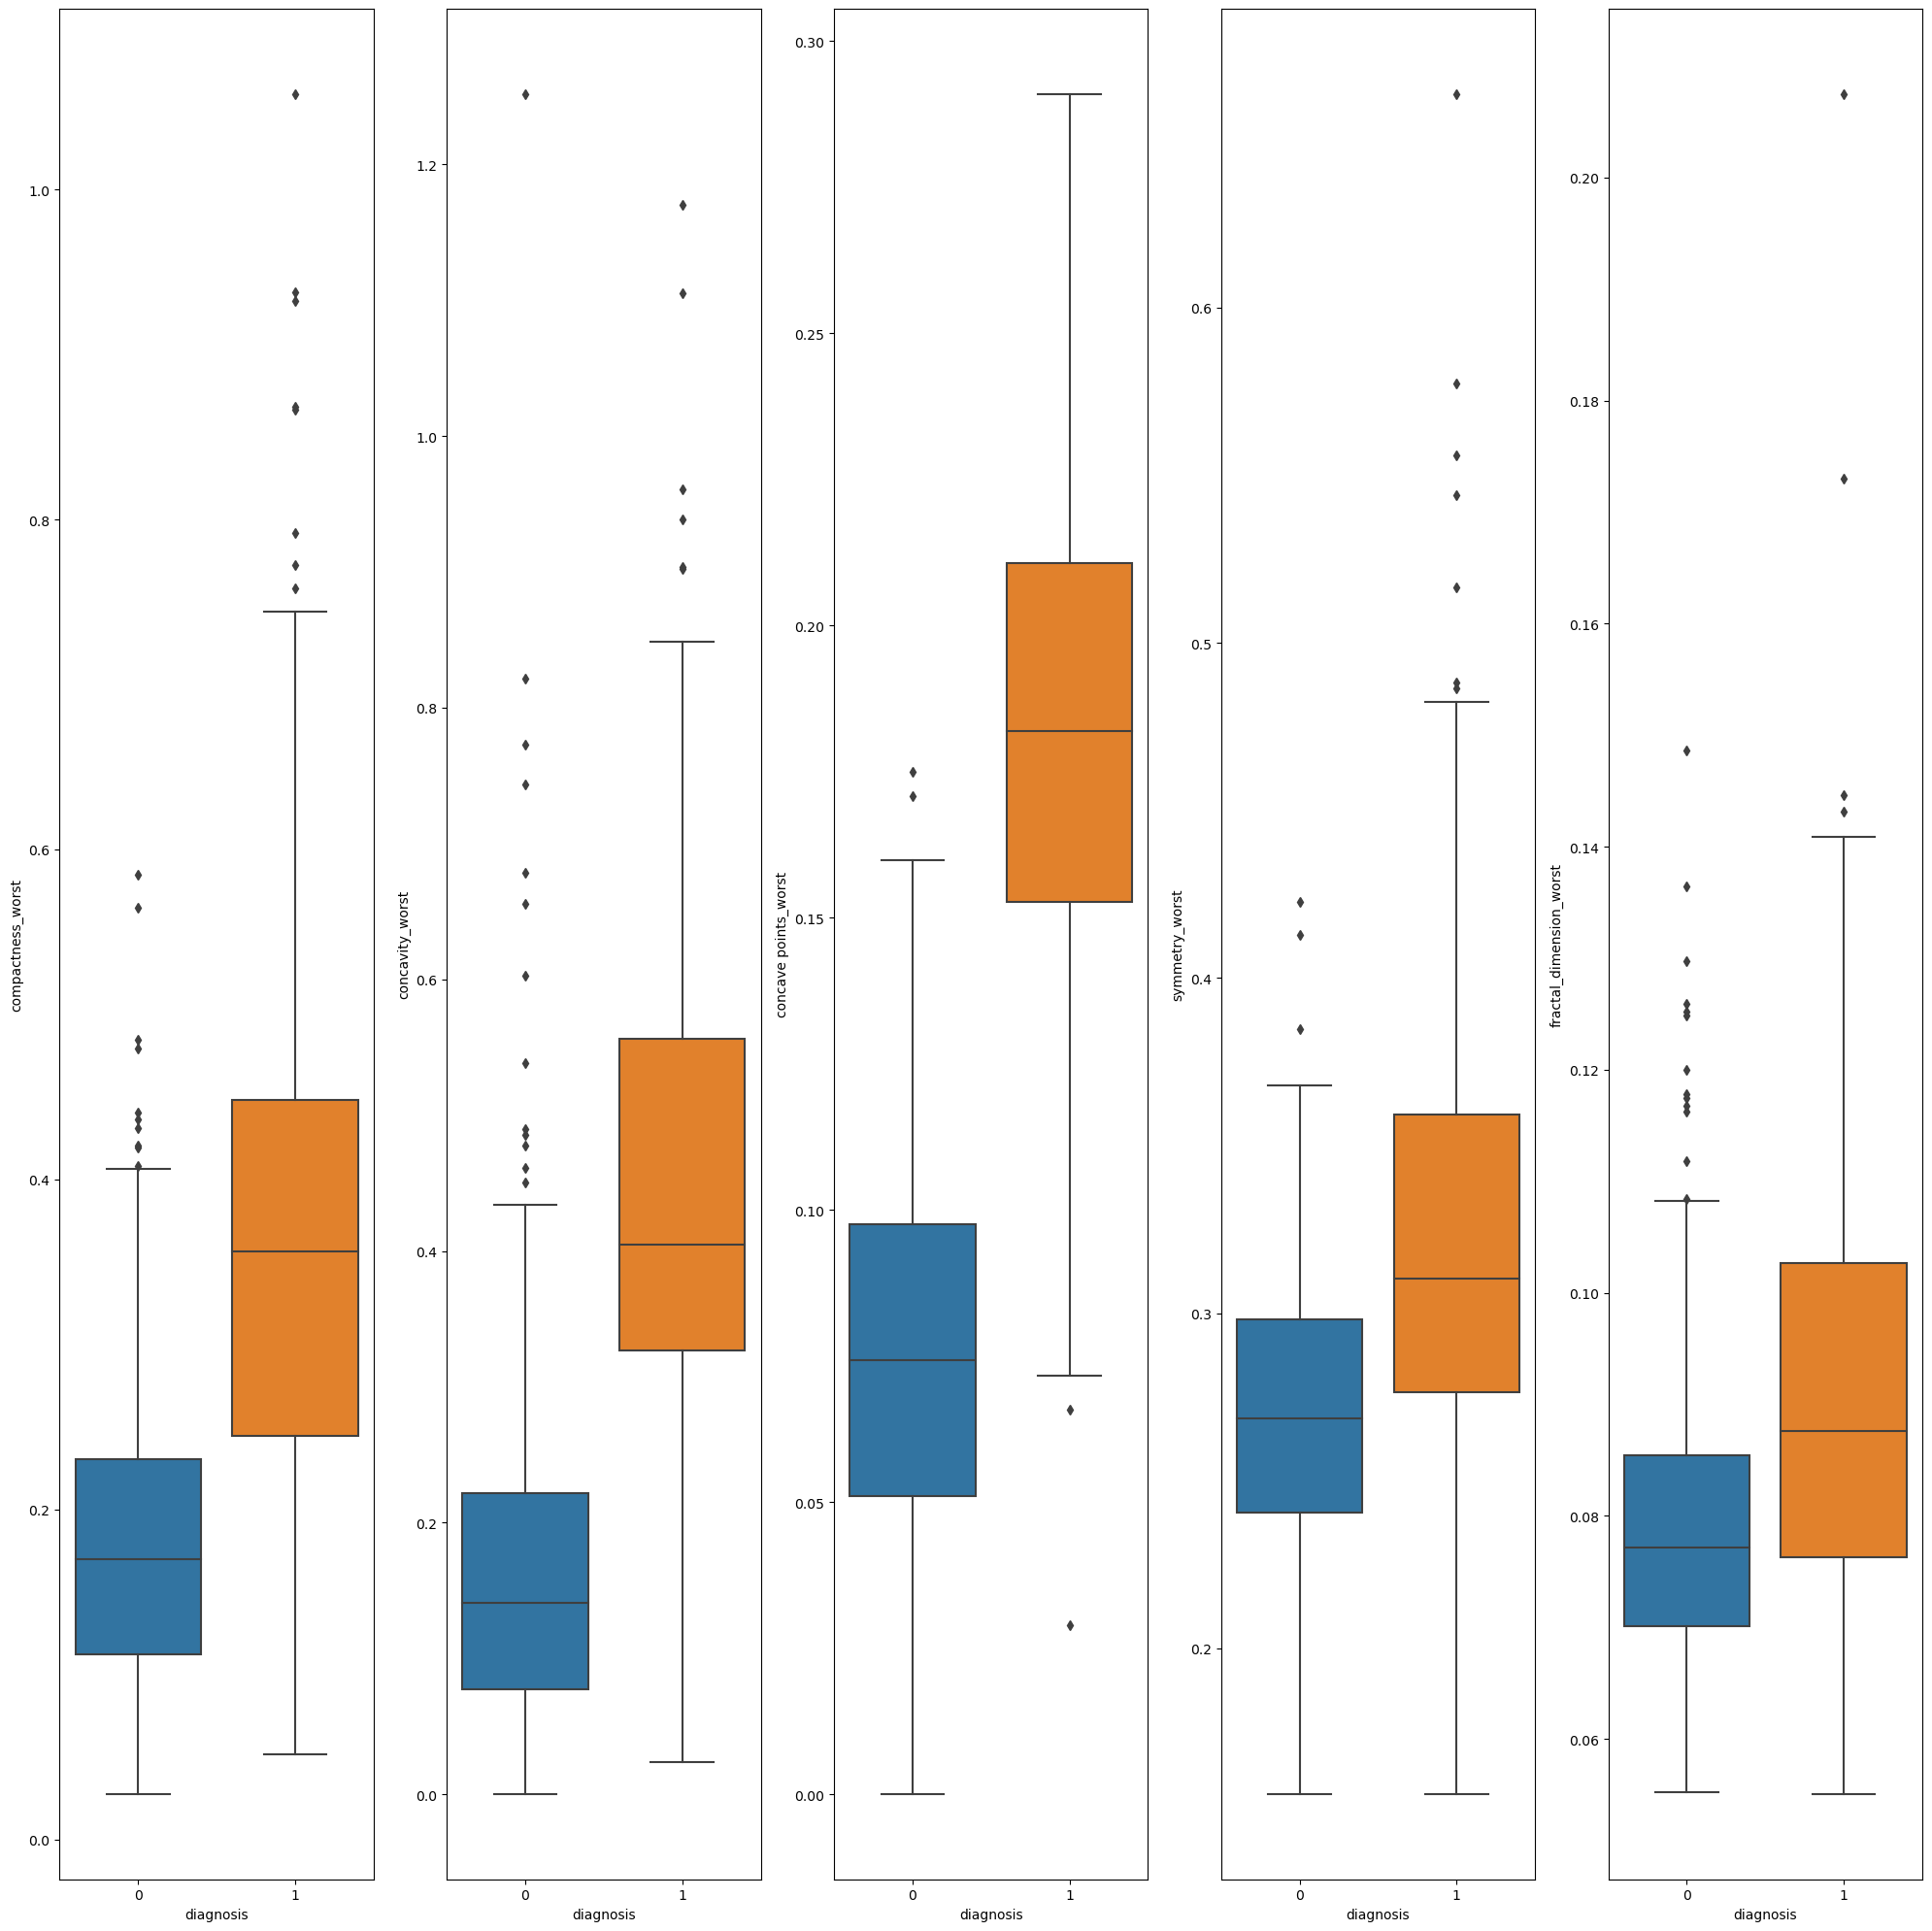

In [19]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot (x= df['diagnosis'], y = df['compactness_worst'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['concavity_worst'] , ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['concave points_worst'] , ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['symmetry_worst'], ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['fractal_dimension_worst'] , ax = ax5)
f .tight_layout()

"Visualizing the data distribution of a Independent variable against the density distribution using Seaborn Distplot in the 
following 6 cells "

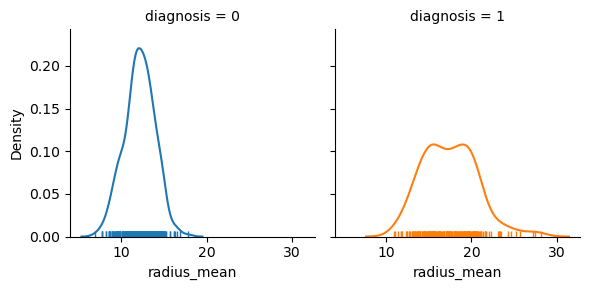

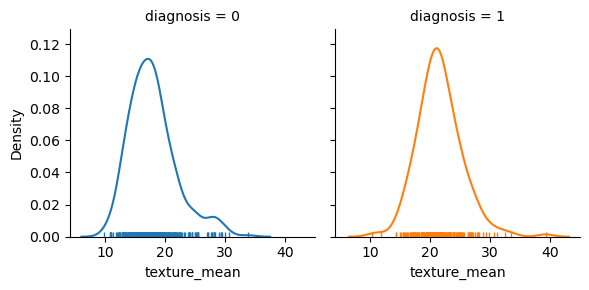

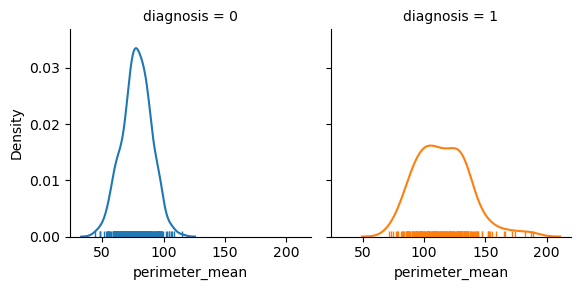

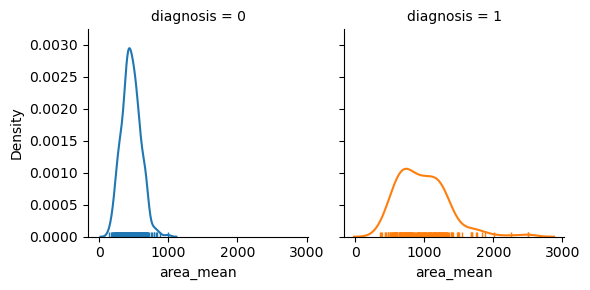

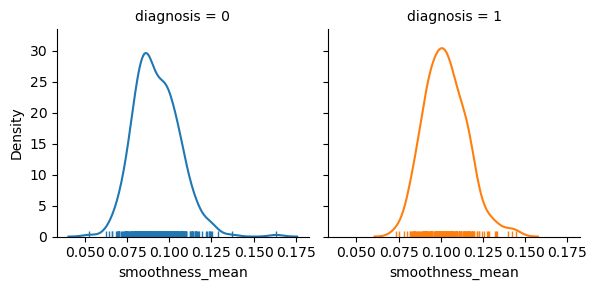

In [20]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "radius_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'texture_mean', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'perimeter_mean', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "area_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "smoothness_mean", hist = False, rug = True)
plt.show()

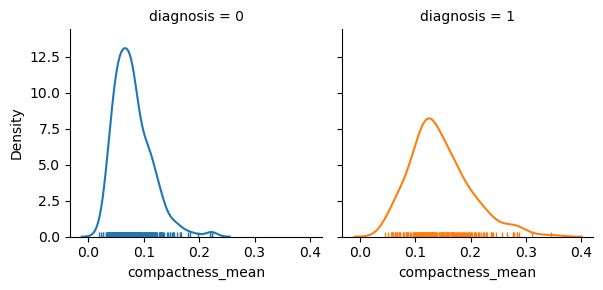

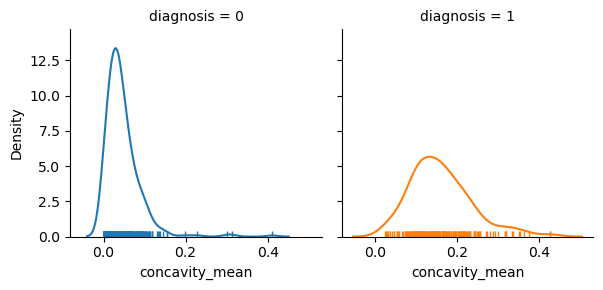

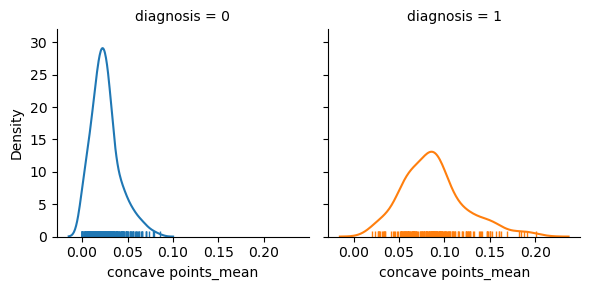

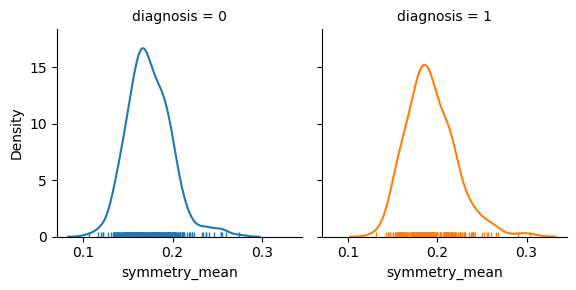

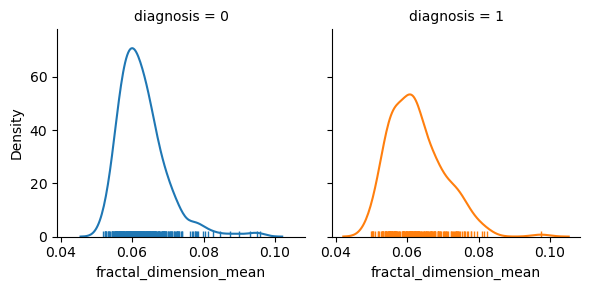

In [21]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "compactness_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concavity_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concave points_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "symmetry_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "fractal_dimension_mean", hist = False, rug = True)
plt.show()

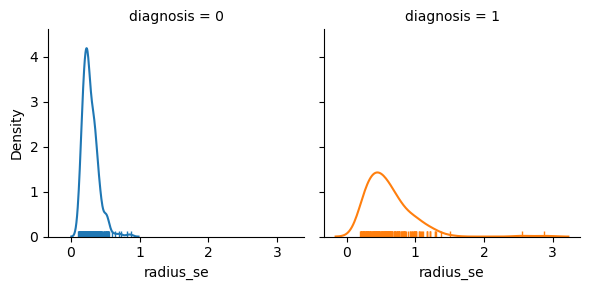

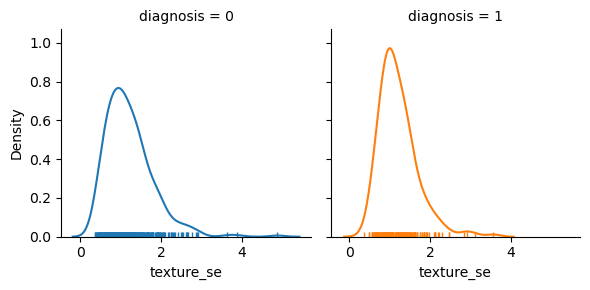

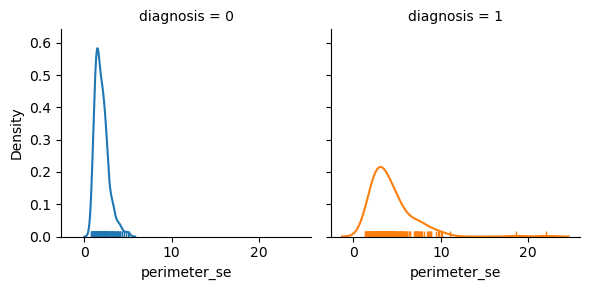

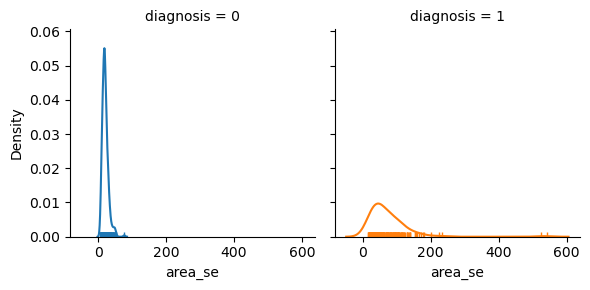

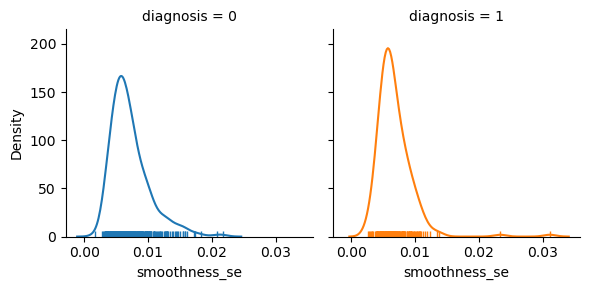

In [22]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "radius_se", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'texture_se', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'perimeter_se', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "area_se", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "smoothness_se", hist = False, rug = True)
plt.show()

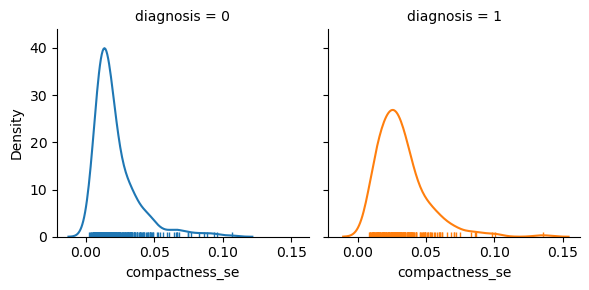

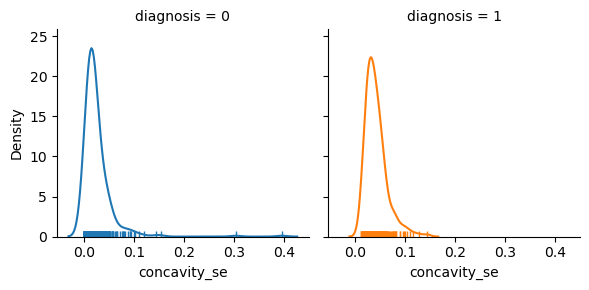

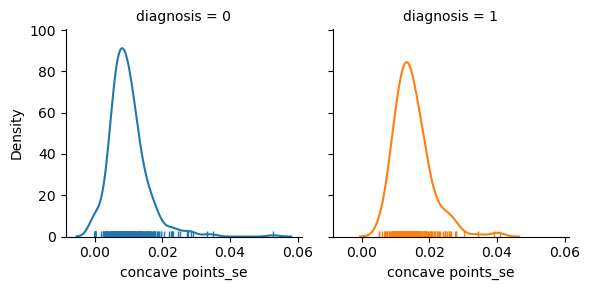

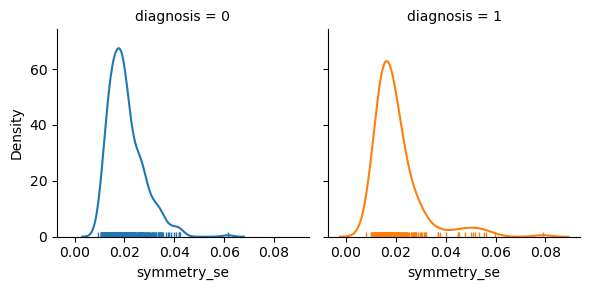

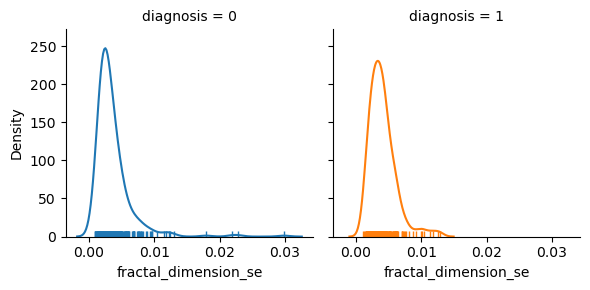

In [23]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "compactness_se", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concavity_se", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concave points_se", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "symmetry_se", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "fractal_dimension_se", hist = False, rug = True)
plt.show()

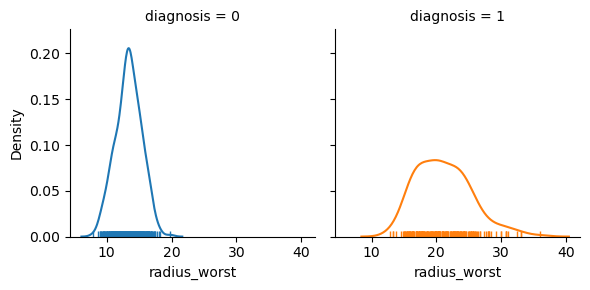

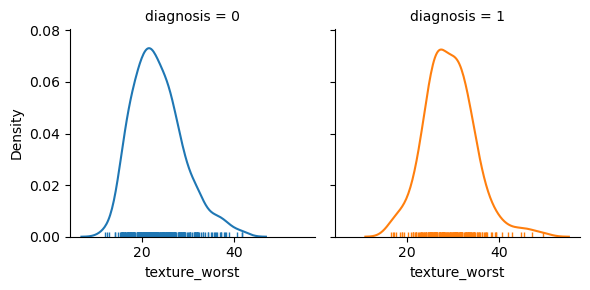

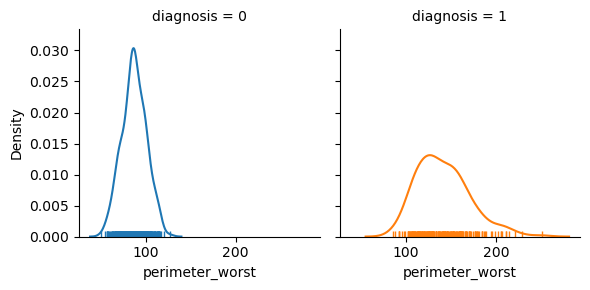

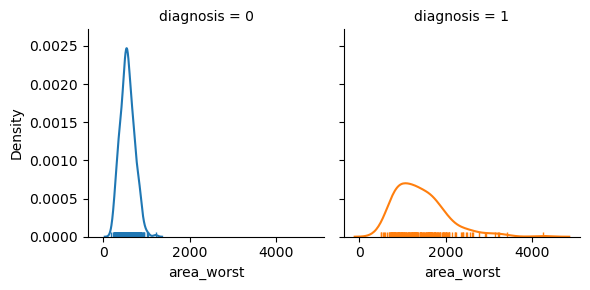

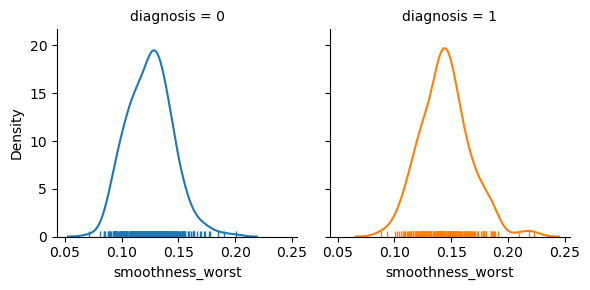

In [24]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "radius_worst", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'texture_worst', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'perimeter_worst', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "area_worst", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "smoothness_worst", hist = False, rug = True)
plt.show()

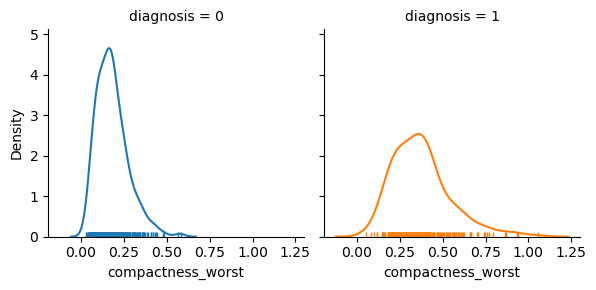

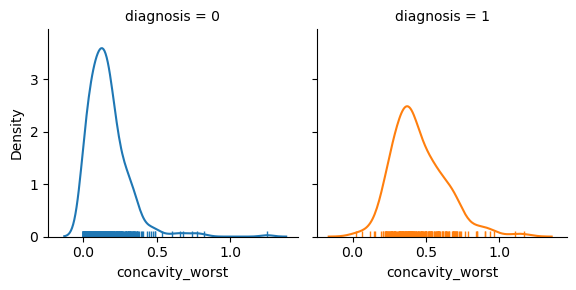

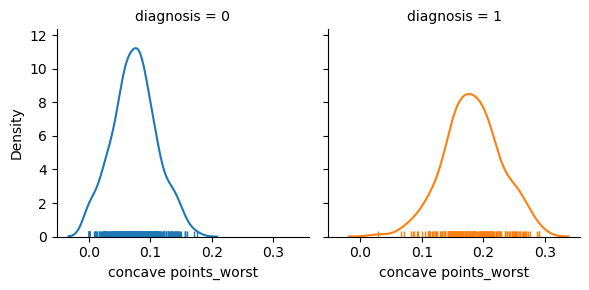

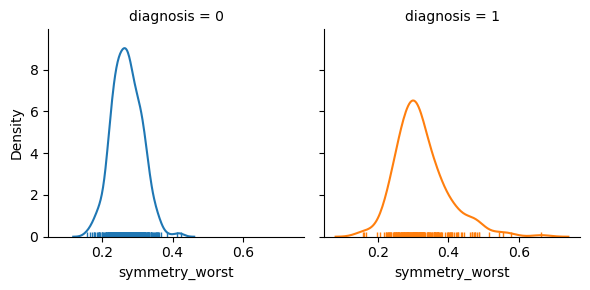

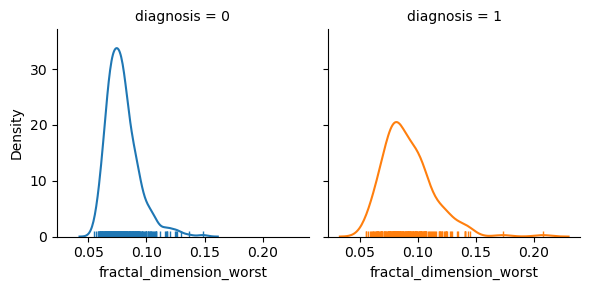

In [25]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "compactness_worst", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concavity_worst", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concave points_worst", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "symmetry_worst", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "fractal_dimension_worst", hist = False, rug = True)
plt.show()

"Defining the Function for the Ml Algorithms using GrdiSearchCV Algorithm and Splitting the dependent and independent variable into training and test dataset and predicting the dependent variable by fitting the given model and create the pickle file of the model with the given algo_name. Further getting the Best Parameters of the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset "

In [27]:
import pickle
def FitModel(x,y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
    grid = GridSearchCV(estimator=algorithm,param_grid=gridSearchParams,scoring='accuracy',cv=cv,verbose=0,n_jobs=-1)
    grid_result = grid.fit(x_train,y_train)
    pred=grid_result.predict(x_test)
    best_params = grid_result.best_params_
    cm = confusion_matrix(y_test,pred)
    pickle.dump(grid_result,open(algo_name,'wb'))
    print('Algorithm Name:',algo_name,'\n')
    print('Best Params:',best_params)
    print('\n Accuracy :',accuracy_score(y_test,pred))
    print('\n Classification Report:',classification_report(y_test,pred))
    print('\n Confusion Matrix:','\n',cm)

"Running the function with some appropriate parameters and fitting the Support Vector Machine Classification Algorithm and getting the  Best Parameters of the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset and also with the pickle file SVC"

In [28]:
params = {'C':[0.1,1,100,1000],
         'gamma':[0.1,0.001,0.005,0.1,1,3,5,10,100]}
FitModel(x,y,'SVC',SVC(),params,cv=10)

Algorithm Name: SVC 

Best Params: {'C': 1, 'gamma': 0.001}

 Accuracy : 0.9210526315789473

 Classification Report:               precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.88      0.90      0.89        39

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114


 Confusion Matrix: 
 [[70  5]
 [ 4 35]]


"Running the function with some appropriate parameters and fitting the Random Forest Classifier Algorithm and getting the Best Parameters of the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset and also with the pickle file RF"

In [29]:
params = {'n_estimators':[100,200,300,500,1000,2000],
         'criterion':['gini','entropy']}
FitModel(x,y,'RF',RandomForestClassifier(),params,cv=10)

Algorithm Name: RF 

Best Params: {'criterion': 'entropy', 'n_estimators': 300}

 Accuracy : 0.9736842105263158

 Classification Report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


 Confusion Matrix: 
 [[73  2]
 [ 1 38]]


"Running the function with some appropriate parameters and fitting the XGBoost 
Classifier Algorithm and getting the Best Parameters of the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset and also with the pickle file XGBoost"

In [33]:
params ={'n_estimators':[100,200,300,400,500]}
FitModel(x,y,'XGBoost',XGBClassifier(),params,cv=10)

Algorithm Name: XGBoost 

Best Params: {'n_estimators': 100}

 Accuracy : 0.9649122807017544

 Classification Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


 Confusion Matrix: 
 [[73  2]
 [ 2 37]]


"Resampling the dependent variable so that the depending variable get balanced"

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(x,y)

In [32]:
y_res.value_counts()

1    357
0    357
Name: diagnosis, dtype: int64

"Running the function with some appropriate parameters with the resampled variables and fitting the Random Forest Classifier Algorithm and getting the Best Parameters of the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset and also with the pickle file RF get updated "

In [33]:
params = {'n_estimators':[100,200,300,500,1000,2000],
          'criterion':['gini','entropy']}
FitModel(x_res,y_res,'Rf',RandomForestClassifier(),params,cv=10)

Algorithm Name: Rf 

Best Params: {'criterion': 'entropy', 'n_estimators': 300}

 Accuracy : 0.993006993006993

 Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.99      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


 Confusion Matrix: 
 [[67  1]
 [ 0 75]]


"Running the function with some appropriate parameters with the resampled variables and fitting the Support Vector Machine Classifier Algorithm and getting the Best Parameters of the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset and also with the pickle file SVC get updated "

In [34]:
params = {'C':[0.1,1,100,1000],
         'gamma':[0.1,0.001,0.005,0.1,1,3,5,10,100]}
FitModel(x_res,y_res,'SVC',SVC(),params,cv=10)

Algorithm Name: SVC 

Best Params: {'C': 100, 'gamma': 0.001}

 Accuracy : 0.9370629370629371

 Classification Report:               precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.92      0.96      0.94        75

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143


 Confusion Matrix: 
 [[62  6]
 [ 3 72]]


"Running the function with some appropriate parameters with the resampled variables and fitting the XGBoost Classifier Algorithm and getting the Best Parameters of the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset and also with the pickle file XGBoost get updated "

In [36]:
params ={'n_estimators':[100,200,300,400,500]}
FitModel(x_res,y_res,'XGBoost',XGBClassifier(),params,cv=10)

Algorithm Name: XGBoost 

Best Params: {'n_estimators': 300}

 Accuracy : 0.986013986013986

 Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


 Confusion Matrix: 
 [[66  2]
 [ 0 75]]


"Fitting the Random Forest Classifier Model with the original dependent and independent variable and  getting the  algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset."

In [37]:
np.random.seed(10)
x_train,x_test, y_train,y_test = train_test_split (x,y,test_size = 0.2)
forest = RandomForestClassifier (n_estimators = 500)
fit = forest.fit (x_train, y_train)
accuracy = fit.score(x_test,y_test)
predict = fit.predict(x_test)
cmatrix = confusion_matrix (y_test, predict)
print ('Classification Report:',classification_report(y_test,predict))
print ('Accuracy Score', (accuracy_score(y_test,predict)))
print ('Accuracy of Random Forest ', (accuracy))
print ('Confusion Matrix :\n',cmatrix)

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score 0.9824561403508771
Accuracy of Random Forest  0.9824561403508771
Confusion Matrix :
 [[73  2]
 [ 0 39]]


"finding the Feature importances of all the columns in the independent variable with respect to Random Forest Classification Model above predicted for the dimensional reduction process"

In [38]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")
for f in range (x.shape[1]):
    print ("Feature %s (%f)"  %(list (x)[f],importances[indices[f]]))


Feature Ranking:
Feature radius_mean (0.139416)
Feature texture_mean (0.137679)
Feature perimeter_mean (0.118768)
Feature area_mean (0.117989)
Feature smoothness_mean (0.077427)
Feature compactness_mean (0.057240)
Feature concavity_mean (0.048971)
Feature concave points_mean (0.045257)
Feature symmetry_mean (0.035983)
Feature fractal_dimension_mean (0.033661)
Feature radius_se (0.030638)
Feature texture_se (0.017393)
Feature perimeter_se (0.015467)
Feature area_se (0.014069)
Feature smoothness_se (0.013795)
Feature compactness_se (0.011398)
Feature concavity_se (0.011063)
Feature concave points_se (0.010804)
Feature symmetry_se (0.008930)
Feature fractal_dimension_se (0.008089)
Feature radius_worst (0.006387)
Feature texture_worst (0.005603)
Feature perimeter_worst (0.005135)
Feature area_worst (0.004920)
Feature smoothness_worst (0.004529)
Feature compactness_worst (0.004402)
Feature concavity_worst (0.004330)
Feature concave points_worst (0.003980)
Feature symmetry_worst (0.003718)
F

"Fitting the Random Forest Classifier Model with the resampled dependent and independent variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset."

In [39]:
np.random.seed(10)
x_train,x_test, y_train,y_test = train_test_split (x_res,y_res,test_size = 0.2)
forest1 = RandomForestClassifier (n_estimators = 500)
fit1 = forest1.fit (x_train, y_train)
accuracy = fit1.score(x_test,y_test)
predict = fit1.predict(x_test)
cmatrix = confusion_matrix (y_test, predict)
print ('Classification Report:',classification_report(y_test,predict))
print ('Accuracy Score', (accuracy_score(y_test,predict)))
print ('Accuracy of Random Forest ', (accuracy))
print ('Confusion Matrix :\n',cmatrix)

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score 0.986013986013986
Accuracy of Random Forest  0.986013986013986
Confusion Matrix :
 [[66  2]
 [ 0 75]]


"finding the Feature importances of all the columns in the independent variable with respect to Random Forest Classification Model fitted with resampled variable in the above cell for the dimensional reduction process"

In [40]:
importances = forest1.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")
for f in range (x.shape[1]):
    print ("Feature %s (%f)"  %(list (x)[f],importances[indices[f]]))


Feature Ranking:
Feature radius_mean (0.129423)
Feature texture_mean (0.128205)
Feature perimeter_mean (0.111420)
Feature area_mean (0.105380)
Feature smoothness_mean (0.085886)
Feature compactness_mean (0.048903)
Feature concavity_mean (0.044122)
Feature concave points_mean (0.043117)
Feature symmetry_mean (0.042778)
Feature fractal_dimension_mean (0.039242)
Feature radius_se (0.030374)
Feature texture_se (0.028608)
Feature perimeter_se (0.018527)
Feature area_se (0.017180)
Feature smoothness_se (0.016024)
Feature compactness_se (0.013380)
Feature concavity_se (0.013205)
Feature concave points_se (0.011923)
Feature symmetry_se (0.009251)
Feature fractal_dimension_se (0.008305)
Feature radius_worst (0.007106)
Feature texture_worst (0.006150)
Feature perimeter_worst (0.005986)
Feature area_worst (0.005982)
Feature smoothness_worst (0.005722)
Feature compactness_worst (0.005442)
Feature concavity_worst (0.005270)
Feature concave points_worst (0.004703)
Feature symmetry_worst (0.004286)
F

"Plotting the Bar Graph to represent the Feature Importances of the Independent variable columns and saving the PNG file"

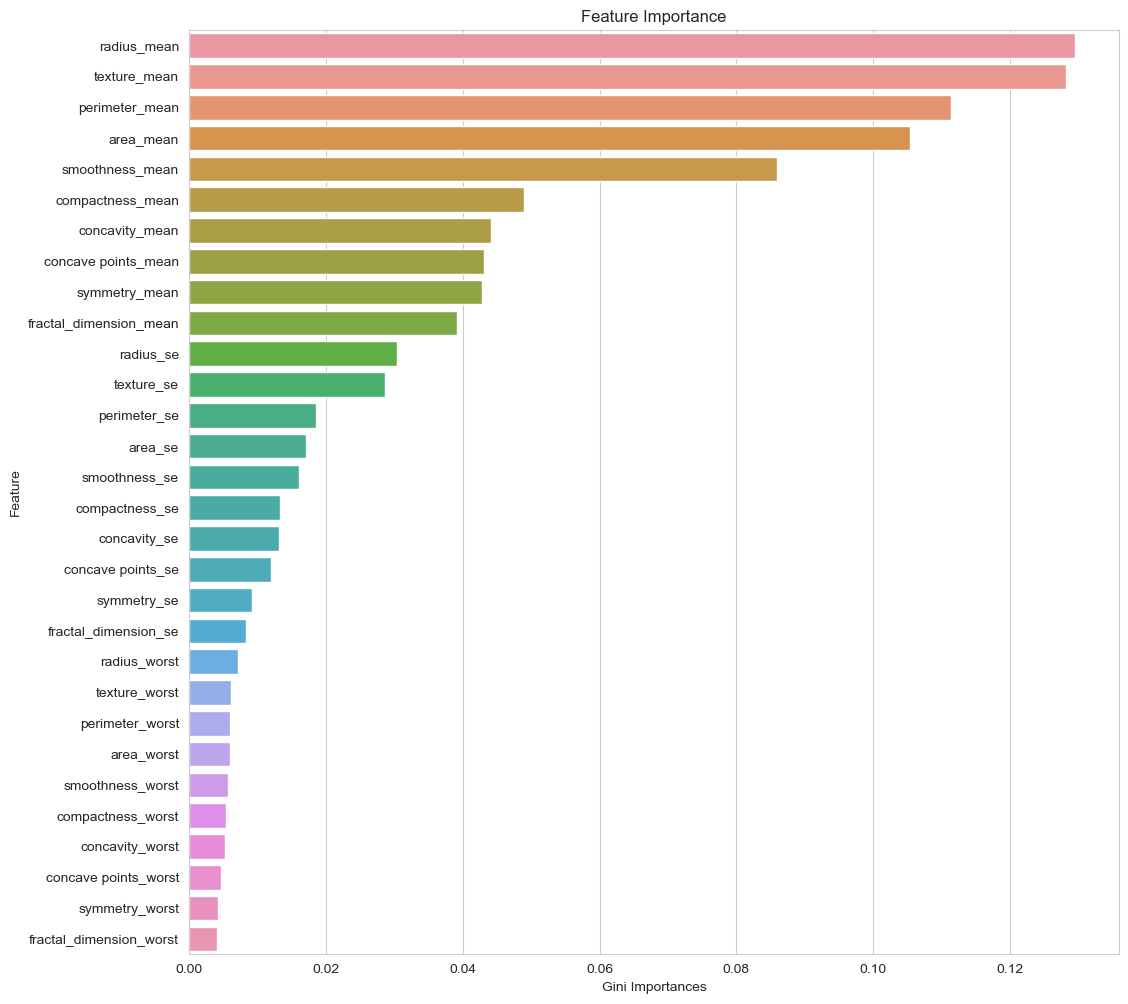

In [41]:
feat_imp = pd.DataFrame({'Feature': list(x), 'Gini importance': importances[indices]})
plt.rcParams['figure.figsize']= (12,12)
sns.set_style ('whitegrid')
ax= sns.barplot(x ='Gini importance', y = 'Feature', data = feat_imp  )
ax.set (xlabel = 'Gini Importances')
plt.title('Feature Importance')
plt.savefig('Feature Importance.png')

"Plotting the Bar Graph to represent the Feature Importances of the Independent variable columns and saving the PNG file"

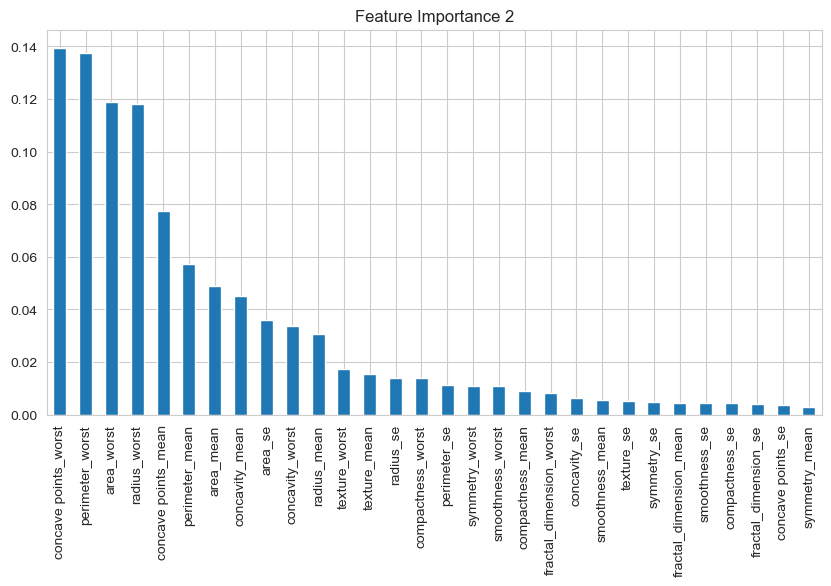

In [42]:
pd.Series(forest.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.title('Feature Importance 2')
plt.savefig('Feature Importance 2.png')
plt.show()

"With respect to feature importance of the independent variable reducing the dimensions of independent variable for reducing the complexity of model fitting"

In [43]:
feat_imp.index = feat_imp.Feature
feat_to_keep = feat_imp.iloc[:15].index
display (type(feat_to_keep),feat_to_keep)

pandas.core.indexes.base.Index

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se'],
      dtype='object', name='Feature')

"Passing the Resampled Variable Dimensional reduction and Running the function with some appropriate parameters and fitting the Random Forest Classifier Algorithm and getting the Best Parameters of the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset and also with the pickle file Random Forest "

In [44]:
X_res = pd.DataFrame(x_res)
Y_res = pd.DataFrame(y_res)
X_res.columns = x.columns
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res [feat_to_keep], Y_res ,'Random Forest',RandomForestClassifier(), param, cv =10)


Algorithm Name: Random Forest 

Best Params: {'n_estimators': 500}

 Accuracy : 0.972027972027972

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.96      0.99      0.97        75

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


 Confusion Matrix: 
 [[65  3]
 [ 1 74]]


"Passing the Resampled Variable Dimensional reduction and Running the function with some appropriate parameters and fitting the Support Vector Machine Classification Algorithm and getting the Best Parameters of the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset and also with the pickle file SVC_resample "

In [45]:
param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (X_res [feat_to_keep], Y_res,'SVC_resample',SVC(), param, cv =5)

Algorithm Name: SVC_resample 

Best Params: {'C': 1000, 'gamma': 0.0001}

 Accuracy : 0.9440559440559441

 Classification Report:               precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.95      0.95      0.95        75

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143


 Confusion Matrix: 
 [[64  4]
 [ 4 71]]


"Passing the Resampled Variable Dimensional reduction and Running the function with some appropriate parameters and fitting the XGBoost Classification Algorithm and getting the Best Parameters of the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset and also with the pickle file XGBoost_resample "

In [46]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res [feat_to_keep], Y_res,'XGBoost_resample', XGBClassifier(),param, cv = 5)

Algorithm Name: XGBoost_resample 

Best Params: {'n_estimators': 100}

 Accuracy : 0.972027972027972

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.96      0.99      0.97        75

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


 Confusion Matrix: 
 [[65  3]
 [ 1 74]]


"Loading the Pickle file with the algorithm which gives highest accuracy score and predicting the independent variable with the accuracy score and best parameters "

In [47]:
load_model =pickle.load(open("RF","rb"))
pred1 = load_model.predict (x_test)
print (load_model.best_params_)
print (accuracy_score (pred1,y_test))

{'criterion': 'entropy', 'n_estimators': 300}
0.993006993006993
